In [1]:
import umap
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import umap.plot
import CDPL.Chem as Chem
import CDPL.Descr as Descr
import CDPL.Util as Util
import sys
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

preprocessing DONE


/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP training DONE


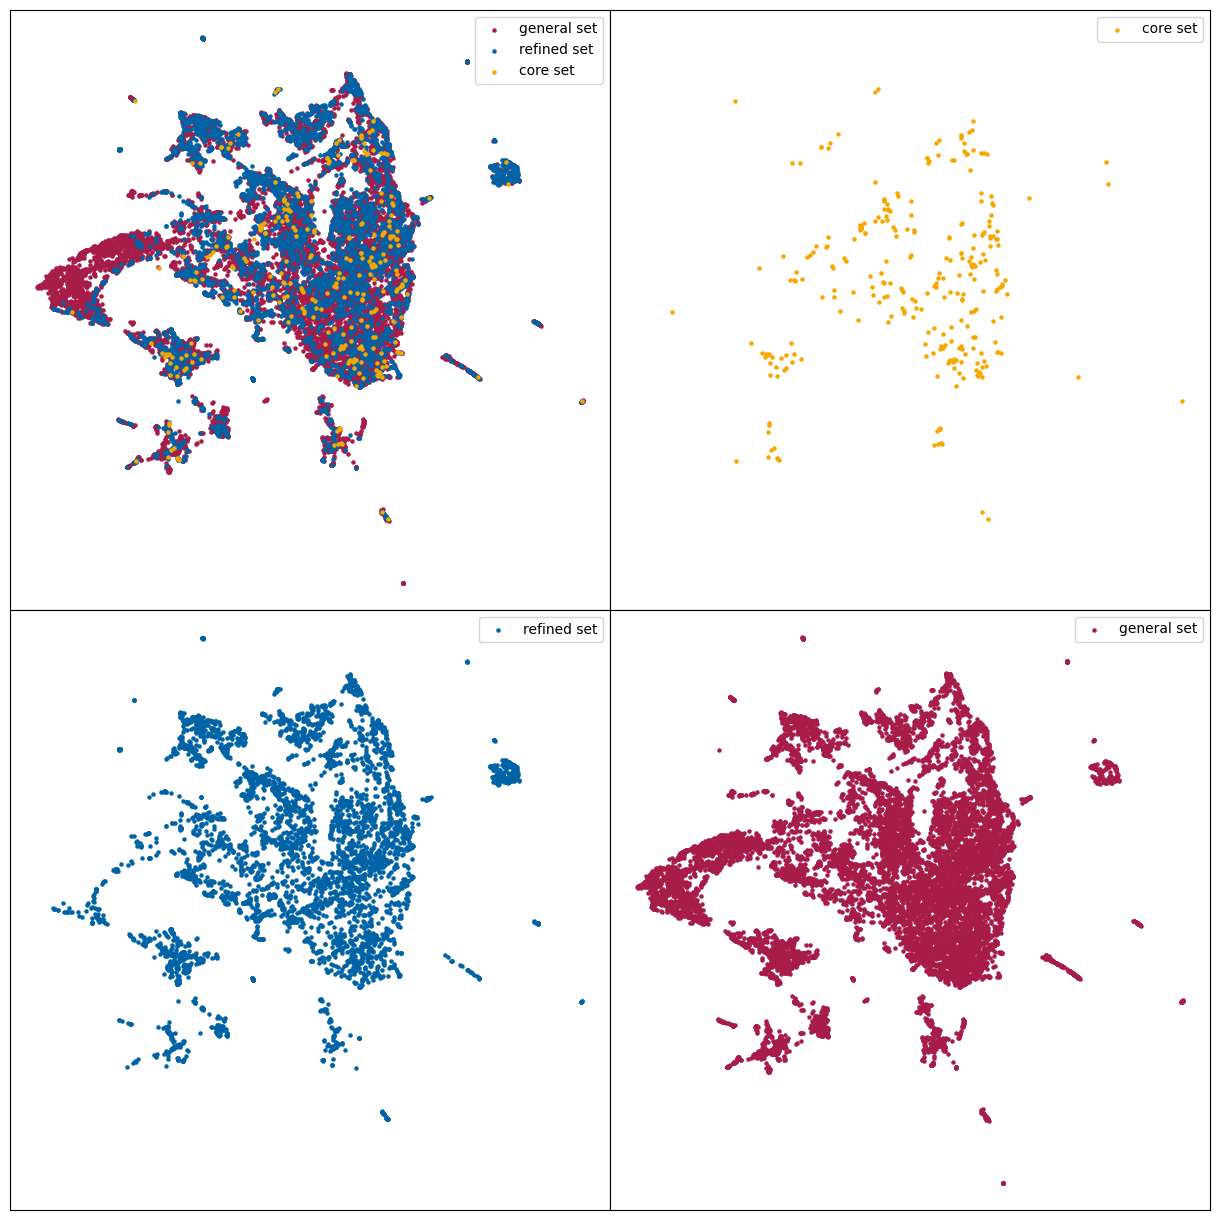

In [2]:
df_general = pd.read_csv("../data/Descriptors/PDBbind_general_set_X-GRADE.csv")
PDB_full1 = []
for i in df_general["PDB code"]:
    PDB_full1.append(i)
df_general.drop("PDB code",inplace=True, axis=1)
df_general["Settype"] = "general set"
df_refined = pd.read_csv("../data/Descriptors/PDBbind_refined_set_X-GRADE.csv")
for i in df_refined["PDB code"]:
    PDB_full1.append(i)
df_refined.drop("PDB code",inplace=True, axis=1)
df_refined["Settype"] = "refined set"
df_core = pd.read_csv("../data/Descriptors/PDBbind_core_set_X-GRADE.csv")
for i in df_core["PDB code"]:
    PDB_full1.append(i)
df_core.drop("PDB code",inplace=True, axis=1)
df_core["Settype"] = "core set"

dataframes = [df_general,df_refined,df_core]
df = pd.concat(dataframes)

settype_full = df["Settype"]

df_data = df.drop("Settype",inplace=False,axis=1)

df_refined_data = df_refined.drop("Settype",inplace=False,axis=1)
df_core_data = df_core.drop("Settype",inplace=False,axis=1)
df_general_data = df_general.drop("Settype",inplace=False,axis=1)
scaler = StandardScaler().fit(df_refined_data)

df_scaled = scaler.transform(df_data)

df_scaled = np.nan_to_num(df_scaled)

pca = PCA(n_components=35)
df_scaled = pca.fit_transform(df_scaled)

print("preprocessing DONE")

reducer =umap.UMAP(random_state=42)

reducer = reducer.fit(df_scaled)
points_all = reducer.fit_transform(df_scaled)
points_general = points_all[df.Settype == "general set"]
points_refined = points_all[df.Settype == "refined set"]
points_core = points_all[df.Settype == "core set"]
print("UMAP training DONE")

fig, axs = plt.subplots(2, 2, figsize=(12, 12),sharex=True,sharey=True,constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=0.0, h_pad=0.0, hspace=0.0, wspace=0.0)

# Plot all points
axs[0, 0].scatter(points_general[:, 0], points_general[:, 1], s=5, label="general set", color="#A71C49", alpha=1)
axs[0, 0].scatter(points_refined[:, 0], points_refined[:, 1], s=5, label="refined set", color="#0063A6", alpha=1)
axs[0, 0].scatter(points_core[:, 0], points_core[:, 1], s=5, label="core set", color="#F6A800", alpha=1)
axs[0, 0].legend(loc="best")

# Plot points_core
axs[0, 1].scatter(points_core[:, 0], points_core[:, 1], s=5, label="core set", color="#F6A800", alpha=1)
axs[0, 1].legend(loc="best")

# Plot points_refined
axs[1, 0].scatter(points_refined[:, 0], points_refined[:, 1], s=5, label="refined set", color="#0063A6", alpha=1)
axs[1, 0].legend(loc="best")

# Plot points_general
axs[1, 1].scatter(points_general[:, 0], points_general[:, 1], s=5, label="general set", color="#A71C49", alpha=1)
axs[1, 1].legend(loc="best")

for ax in axs:
    for a in ax:
        a.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

plt.show()

X_GRADE_x = points_all[:,0]
X_GRADE_y = points_all[:,1]

preprocessing DONE


/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP training DONE


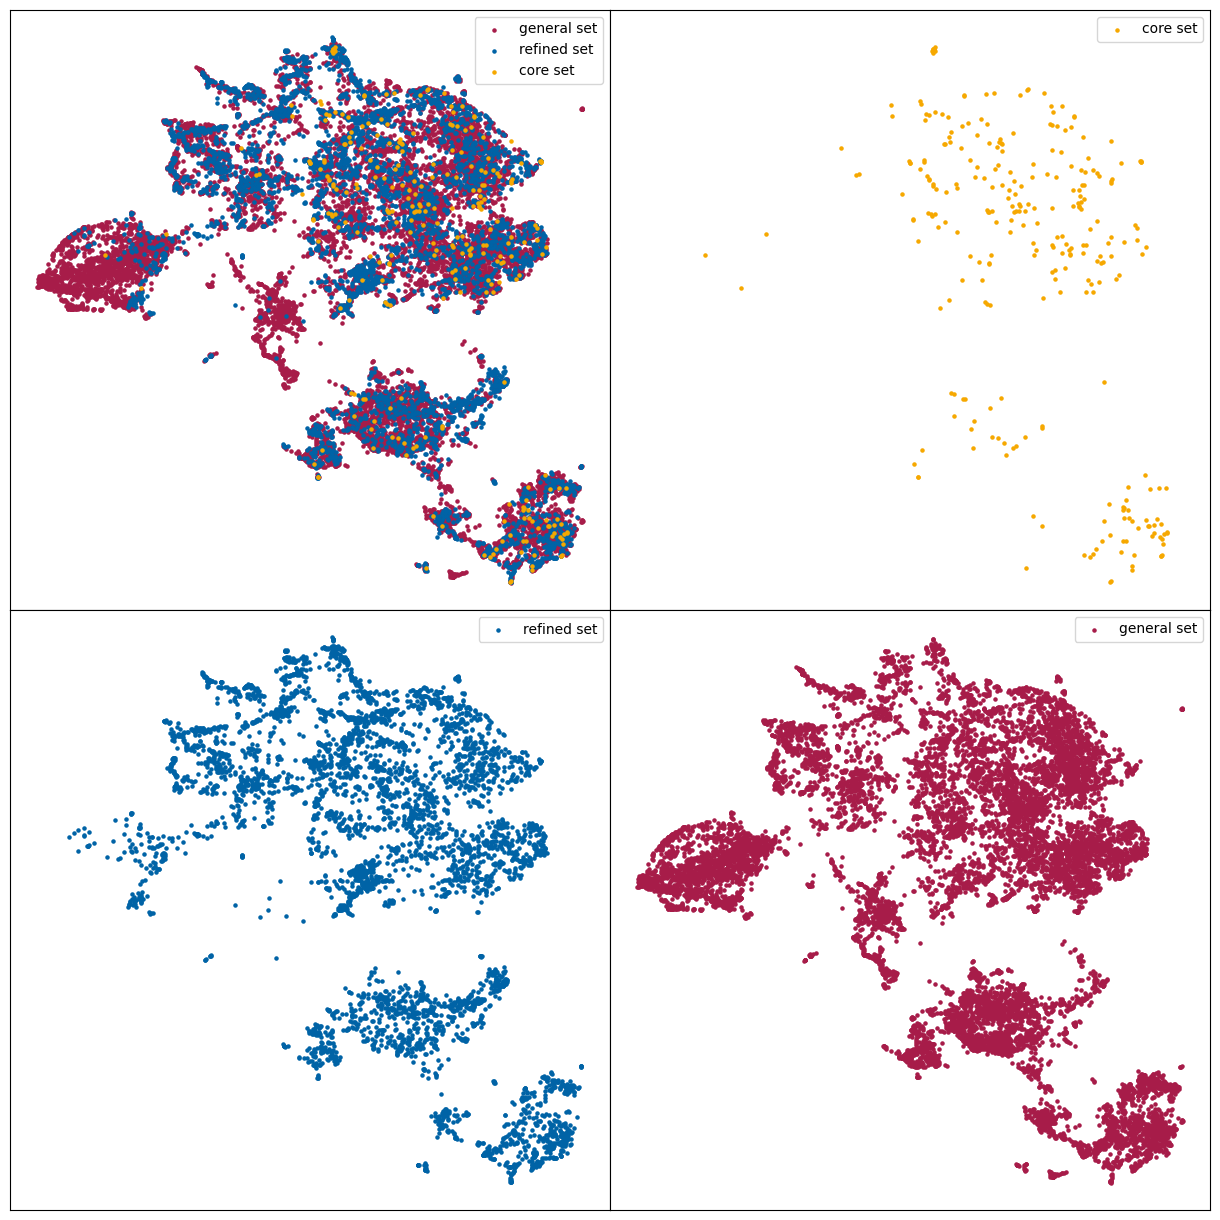

In [3]:
df_general = pd.read_csv("../data/Descriptors/PDBbind_general_set_GRADE.csv")
PDB_full2 = []
for i in df_general["PDB code"]:
    PDB_full2.append(i)
df_general.drop("PDB code",inplace=True, axis=1)
df_general["Settype"] = "general set"
df_refined = pd.read_csv("../data/Descriptors/PDBbind_refined_set_GRADE.csv")
for i in df_refined["PDB code"]:
    PDB_full2.append(i)
df_refined.drop("PDB code",inplace=True, axis=1)
df_refined["Settype"] = "refined set"
df_core = pd.read_csv("../data/Descriptors/PDBbind_core_set_GRADE.csv")
for i in df_core["PDB code"]:
    PDB_full2.append(i)
df_core.drop("PDB code",inplace=True, axis=1)
df_core["Settype"] = "core set"

dataframes = [df_general,df_refined,df_core]
df = pd.concat(dataframes)

df_data = df.drop("Settype",inplace=False,axis=1)

df_refined_data = df_refined.drop("Settype",inplace=False,axis=1)
df_core_data = df_core.drop("Settype",inplace=False,axis=1)
df_general_data = df_general.drop("Settype",inplace=False,axis=1)
scaler = StandardScaler().fit(df_refined_data)

df_scaled = scaler.transform(df_data)

df_scaled = np.nan_to_num(df_scaled)

print("preprocessing DONE")

reducer =umap.UMAP(random_state=42)

points_all = reducer.fit_transform(df_scaled)
points_general = points_all[df.Settype == "general set"]
points_refined = points_all[df.Settype == "refined set"]
points_core = points_all[df.Settype == "core set"]
print("UMAP training DONE")

fig, axs = plt.subplots(2, 2, figsize=(12, 12),sharex=True,sharey=True,constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=0.0, h_pad=0.0, hspace=0.0, wspace=0.0)

# Plot all points
axs[0, 0].scatter(points_general[:, 0], points_general[:, 1], s=5, label="general set", color="#A71C49", alpha=1)
axs[0, 0].scatter(points_refined[:, 0], points_refined[:, 1], s=5, label="refined set", color="#0063A6", alpha=1)
axs[0, 0].scatter(points_core[:, 0], points_core[:, 1], s=5, label="core set", color="#F6A800", alpha=1)
axs[0, 0].legend(loc="best")

# Plot points_core
axs[0, 1].scatter(points_core[:, 0], points_core[:, 1], s=5, label="core set", color="#F6A800", alpha=1)
axs[0, 1].legend(loc="best")

# Plot points_refined
axs[1, 0].scatter(points_refined[:, 0], points_refined[:, 1], s=5, label="refined set", color="#0063A6", alpha=1)
axs[1, 0].legend(loc="best")

# Plot points_general
axs[1, 1].scatter(points_general[:, 0], points_general[:, 1], s=5, label="general set", color="#A71C49", alpha=1)
axs[1, 1].legend(loc="best")

for ax in axs:
    for a in ax:
        a.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
        
plt.show()

GRADE_x = points_all[:,0]
GRADE_y = points_all[:,1]

preprocessing DONE


/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(19727, 2) (8141, 2) (460, 2) (4718, 2) (4914, 2) (772, 2) (295, 2) (426, 2) (1, 2)
UMAP training DONE


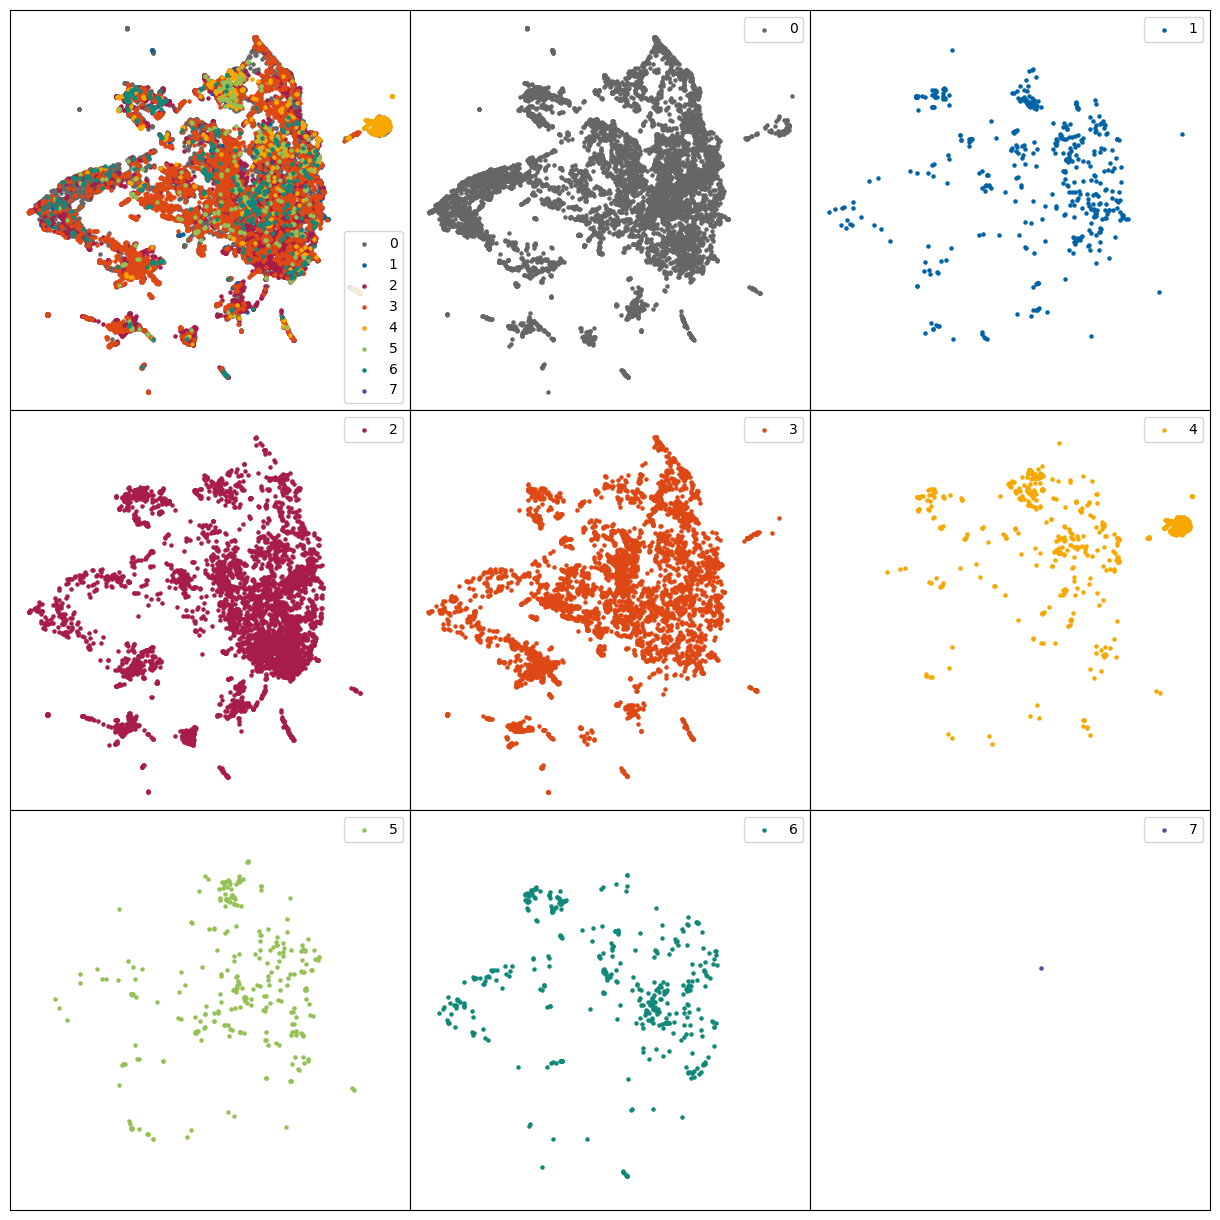

In [4]:
df_general = pd.read_csv("../data/Descriptors/PDBbind_general_set_X-GRADE.csv")
df_refined = pd.read_csv("../data/Descriptors/PDBbind_refined_set_X-GRADE.csv")
df_core = pd.read_csv("../data/Descriptors/PDBbind_core_set_X-GRADE.csv")

dataframes = [df_general,df_refined,df_core]
df = pd.concat(dataframes)

df_1 = pd.read_csv("../data/exp_data/EC_numbers/1_x_x_x.csv")
df_2 = pd.read_csv("../data/exp_data/EC_numbers/2_x_x_x.csv")
df_3 = pd.read_csv("../data/exp_data/EC_numbers/3_x_x_x.csv")
df_4 = pd.read_csv("../data/exp_data/EC_numbers/4_x_x_x.csv")
df_5 = pd.read_csv("../data/exp_data/EC_numbers/5_x_x_x.csv")
df_6 = pd.read_csv("../data/exp_data/EC_numbers/6_x_x_x.csv")
df_7 = pd.read_csv("../data/exp_data/EC_numbers/7_x_x_x.csv")

lst = []

for pdb in df["PDB code"]:
    if pdb in df_1["PDB code"].values:
        lst.append(1)
    elif pdb in df_2["PDB code"].values:
        lst.append(2)
    elif pdb in df_3["PDB code"].values:
        lst.append(3)
    elif pdb in df_4["PDB code"].values:
        lst.append(4)
    elif pdb in df_5["PDB code"].values:
        lst.append(5)
    elif pdb in df_6["PDB code"].values:
        lst.append(6)
    elif pdb in df_7["PDB code"].values:
        lst.append(7)
    else:
        lst.append(0)

df["Class"] = lst

df.drop("PDB code",inplace=True, axis=1)

df_data = df.drop("Class",inplace=False,axis=1)

df_refined_data = df_refined.drop("PDB code",inplace=False,axis=1)
scaler = StandardScaler().fit(df_refined_data)

df_scaled = scaler.transform(df_data)

df_scaled = np.nan_to_num(df_scaled)

pca = PCA(n_components=35)
df_scaled = pca.fit_transform(df_scaled)

print("preprocessing DONE")

reducer =umap.UMAP(random_state=42)

reducer = reducer.fit(df_scaled)
points_all = reducer.fit_transform(df_scaled)
points_0 = points_all[df.Class == 0]
points_1 = points_all[df.Class == 1]
points_2 = points_all[df.Class == 2]
points_3 = points_all[df.Class == 3]
points_4 = points_all[df.Class == 4]
points_5 = points_all[df.Class == 5]
points_6 = points_all[df.Class == 6]
points_7 = points_all[df.Class == 7]
print(points_all.shape,points_0.shape,points_1.shape,points_2.shape,points_3.shape,points_4.shape,points_5.shape,points_6.shape,points_7.shape)
print("UMAP training DONE")

fig, axs = plt.subplots(3, 3, figsize=(12, 12),sharex=True,sharey=True,constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=0.0, h_pad=0.0, hspace=0.0, wspace=0.0)

# Plot all points
axs[0, 0].scatter(points_0[:, 0], points_0[:, 1], s=5, label="0", color="#666666", alpha=1)
axs[0, 0].scatter(points_1[:, 0], points_1[:, 1], s=5, label="1", color="#0063A6", alpha=1)
axs[0, 0].scatter(points_2[:, 0], points_2[:, 1], s=5, label="2", color="#A71C49", alpha=1)
axs[0, 0].scatter(points_3[:, 0], points_3[:, 1], s=5, label="3", color="#DD4814", alpha=1)
axs[0, 0].scatter(points_4[:, 0], points_4[:, 1], s=5, label="4", color="#F6A800", alpha=1)
axs[0, 0].scatter(points_5[:, 0], points_5[:, 1], s=5, label="5", color="#94C154", alpha=1)
axs[0, 0].scatter(points_6[:, 0], points_6[:, 1], s=5, label="6", color="#11897A", alpha=1)
axs[0, 0].scatter(points_7[:, 0], points_7[:, 1], s=5, label="7", color="#4B51A1", alpha=1)
axs[0, 0].legend(loc="best")

# Plot points_0
axs[0, 1].scatter(points_0[:, 0], points_0[:, 1], s=5, label="0", color="#666666", alpha=1)
axs[0, 1].legend(loc="best")

# Plot points_1
axs[0, 2].scatter(points_1[:, 0], points_1[:, 1], s=5, label="1", color="#0063A6", alpha=1)
axs[0, 2].legend(loc="best")

# Plot points_2
axs[1, 0].scatter(points_2[:, 0], points_2[:, 1], s=5, label="2", color="#A71C49", alpha=1)
axs[1, 0].legend(loc="best")

# Plot points_3
axs[1, 1].scatter(points_3[:, 0], points_3[:, 1], s=5, label="3", color="#DD4814", alpha=1)
axs[1, 1].legend(loc="best")

# Plot points_4
axs[1, 2].scatter(points_4[:, 0], points_4[:, 1], s=5, label="4", color="#F6A800", alpha=1)
axs[1, 2].legend(loc="best")

# Plot points_5
axs[2, 0].scatter(points_5[:, 0], points_5[:, 1], s=5, label="5", color="#94C154", alpha=1)
axs[2, 0].legend(loc="best")

# Plot points_6
axs[2, 1].scatter(points_6[:, 0], points_6[:, 1], s=5, label="6", color="#11897A", alpha=1)
axs[2, 1].legend(loc="best")

# Plot points_7
axs[2, 2].scatter(points_7[:, 0], points_7[:, 1], s=5, label="7", color="#4B51A1", alpha=1)
axs[2, 2].legend(loc="best")

for ax in axs:
    for a in ax:
        a.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
        
plt.show()

preprocessing DONE


/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(19727, 2) (8141, 2) (460, 2) (4718, 2) (4914, 2) (772, 2) (295, 2) (426, 2) (1, 2)
UMAP training DONE


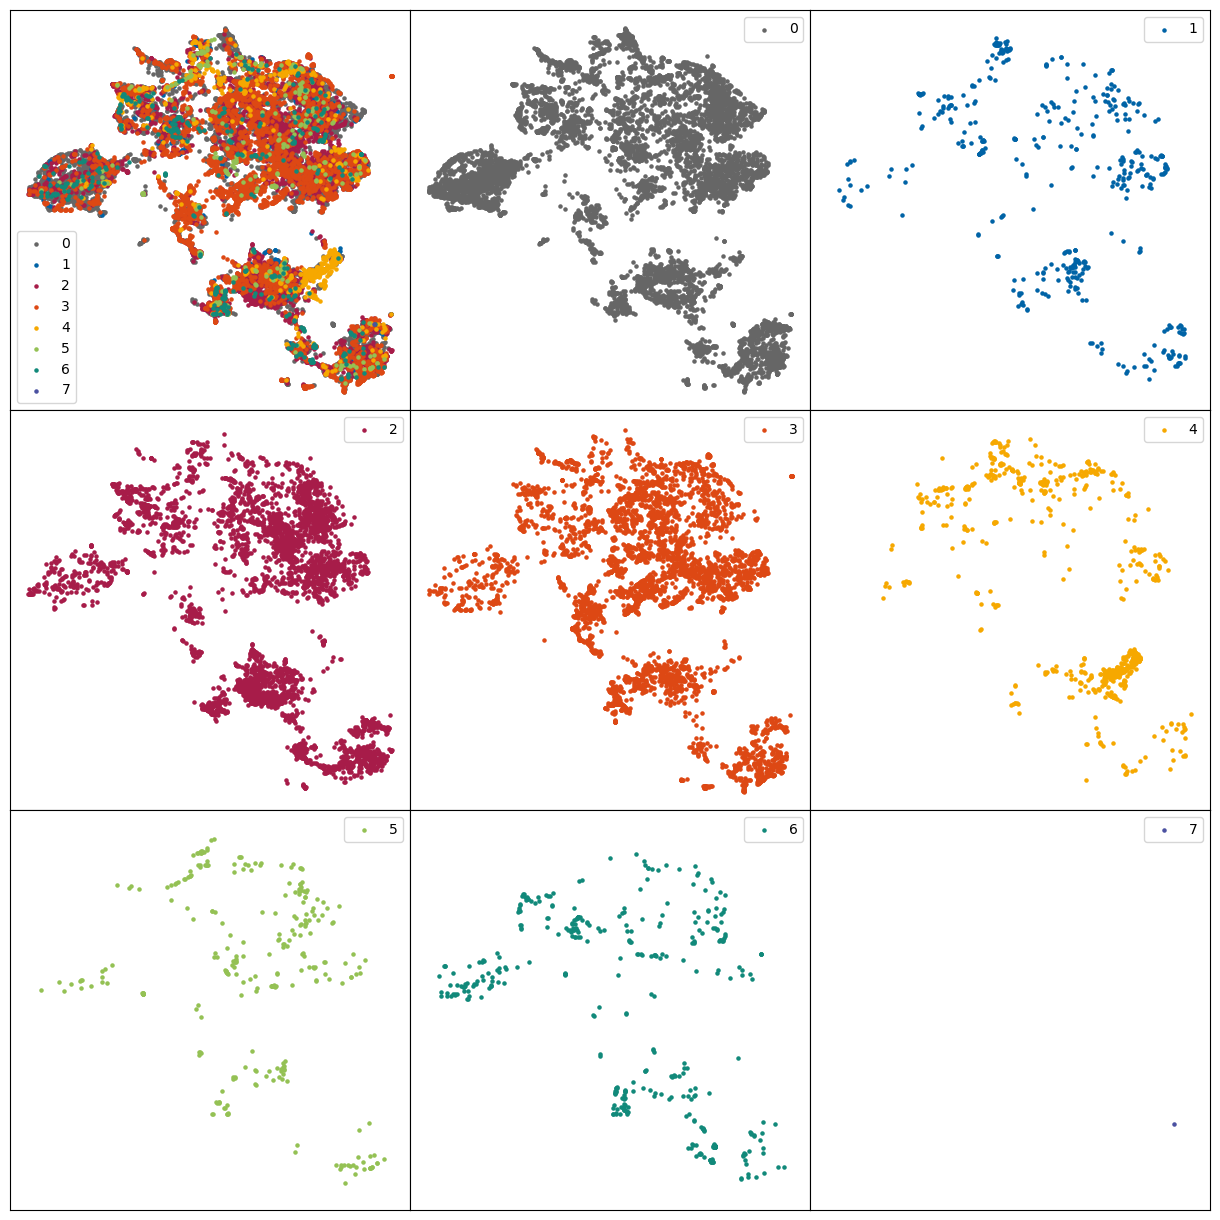

In [5]:
df_general = pd.read_csv("../data/Descriptors/PDBbind_general_set_GRADE.csv")
df_refined = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/GAP/data/ref_set_descrs.csv")
df_core = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/GAP/data/core_set_descrs.csv")

dataframes = [df_general,df_refined,df_core]
df = pd.concat(dataframes)

df_1 = pd.read_csv("../data/exp_data/EC_numbers/1_x_x_x.csv")
df_2 = pd.read_csv("../data/exp_data/EC_numbers/2_x_x_x.csv")
df_3 = pd.read_csv("../data/exp_data/EC_numbers/3_x_x_x.csv")
df_4 = pd.read_csv("../data/exp_data/EC_numbers/4_x_x_x.csv")
df_5 = pd.read_csv("../data/exp_data/EC_numbers/5_x_x_x.csv")
df_6 = pd.read_csv("../data/exp_data/EC_numbers/6_x_x_x.csv")
df_7 = pd.read_csv("../data/exp_data/EC_numbers/7_x_x_x.csv")

lst = []

for pdb in df["PDB code"]:
    if pdb in df_1["PDB code"].values:
        lst.append(1)
    elif pdb in df_2["PDB code"].values:
        lst.append(2)
    elif pdb in df_3["PDB code"].values:
        lst.append(3)
    elif pdb in df_4["PDB code"].values:
        lst.append(4)
    elif pdb in df_5["PDB code"].values:
        lst.append(5)
    elif pdb in df_6["PDB code"].values:
        lst.append(6)
    elif pdb in df_7["PDB code"].values:
        lst.append(7)
    else:
        lst.append(0)

df["Class"] = lst

df.drop("PDB code",inplace=True, axis=1)

df_data = df.drop("Class",inplace=False,axis=1)

df_refined_data = df_refined.drop("PDB code",inplace=False,axis=1)
scaler = StandardScaler().fit(df_refined_data)

df_scaled = scaler.transform(df_data)

df_scaled = np.nan_to_num(df_scaled)
print("preprocessing DONE")

reducer =umap.UMAP(random_state=42)

reducer = reducer.fit(df_scaled)
points_all = reducer.fit_transform(df_scaled)
points_0 = points_all[df.Class == 0]
points_1 = points_all[df.Class == 1]
points_2 = points_all[df.Class == 2]
points_3 = points_all[df.Class == 3]
points_4 = points_all[df.Class == 4]
points_5 = points_all[df.Class == 5]
points_6 = points_all[df.Class == 6]
points_7 = points_all[df.Class == 7]
print(points_all.shape,points_0.shape,points_1.shape,points_2.shape,points_3.shape,points_4.shape,points_5.shape,points_6.shape,points_7.shape)
print("UMAP training DONE")

fig, axs = plt.subplots(3, 3, figsize=(12, 12),sharex=True,sharey=True,constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=0.0, h_pad=0.0, hspace=0.0, wspace=0.0)

# Plot all points
axs[0, 0].scatter(points_0[:, 0], points_0[:, 1], s=5, label="0", color="#666666", alpha=1)
axs[0, 0].scatter(points_1[:, 0], points_1[:, 1], s=5, label="1", color="#0063A6", alpha=1)
axs[0, 0].scatter(points_2[:, 0], points_2[:, 1], s=5, label="2", color="#A71C49", alpha=1)
axs[0, 0].scatter(points_3[:, 0], points_3[:, 1], s=5, label="3", color="#DD4814", alpha=1)
axs[0, 0].scatter(points_4[:, 0], points_4[:, 1], s=5, label="4", color="#F6A800", alpha=1)
axs[0, 0].scatter(points_5[:, 0], points_5[:, 1], s=5, label="5", color="#94C154", alpha=1)
axs[0, 0].scatter(points_6[:, 0], points_6[:, 1], s=5, label="6", color="#11897A", alpha=1)
axs[0, 0].scatter(points_7[:, 0], points_7[:, 1], s=5, label="7", color="#4B51A1", alpha=1)
axs[0, 0].legend(loc="best")

# Plot points_0
axs[0, 1].scatter(points_0[:, 0], points_0[:, 1], s=5, label="0", color="#666666", alpha=1)
axs[0, 1].legend(loc="best")

# Plot points_1
axs[0, 2].scatter(points_1[:, 0], points_1[:, 1], s=5, label="1", color="#0063A6", alpha=1)
axs[0, 2].legend(loc="best")

# Plot points_2
axs[1, 0].scatter(points_2[:, 0], points_2[:, 1], s=5, label="2", color="#A71C49", alpha=1)
axs[1, 0].legend(loc="best")

# Plot points_3
axs[1, 1].scatter(points_3[:, 0], points_3[:, 1], s=5, label="3", color="#DD4814", alpha=1)
axs[1, 1].legend(loc="best")

# Plot points_4
axs[1, 2].scatter(points_4[:, 0], points_4[:, 1], s=5, label="4", color="#F6A800", alpha=1)
axs[1, 2].legend(loc="best")

# Plot points_5
axs[2, 0].scatter(points_5[:, 0], points_5[:, 1], s=5, label="5", color="#94C154", alpha=1)
axs[2, 0].legend(loc="best")

# Plot points_6
axs[2, 1].scatter(points_6[:, 0], points_6[:, 1], s=5, label="6", color="#11897A", alpha=1)
axs[2, 1].legend(loc="best")

# Plot points_7
axs[2, 2].scatter(points_7[:, 0], points_7[:, 1], s=5, label="7", color="#4B51A1", alpha=1)
axs[2, 2].legend(loc="best")

for ax in axs:
    for a in ax:
        a.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
        
plt.show()

preprocessing DONE


/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWar

UMAP training DONE


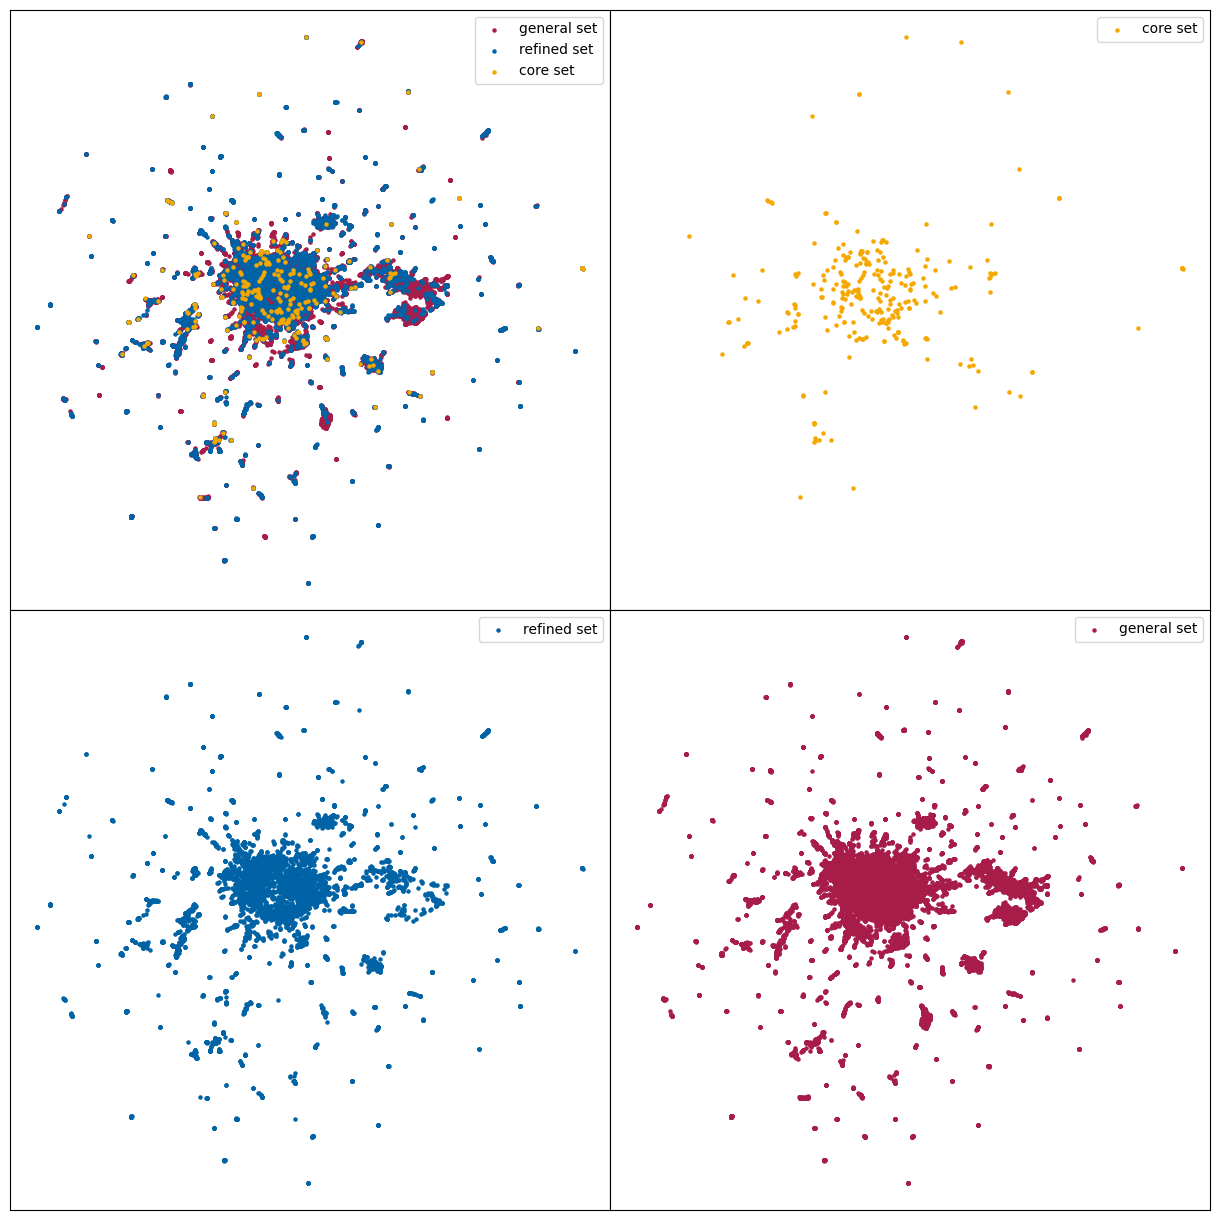

In [26]:
df = pd.read_csv("../data/Descriptors/ECFPs.csv")
df.drop("PDB code",inplace=True, axis=1)

df.replace("general-set","general set",inplace=True)
df.replace("refined-set","refined set",inplace=True)
df.replace("coreset","core set",inplace=True)

df_general = df[df["Settype"] == "general set"]
df_refined = df[df["Settype"] == "refined set"]
df_core = df[df["Settype"] == "core set"]

df_data = df.drop("Settype",inplace=False,axis=1)
df_refined_data = df[df["Settype"] == "refined set"].drop("Settype",inplace=False,axis=1)

scaler = StandardScaler().fit(df_refined_data)

df_scaled = scaler.transform(df_data)

df_scaled = np.nan_to_num(df_scaled)

pca = PCA(n_components=35)
df_scaled = pca.fit_transform(df_scaled)

print("preprocessing DONE")

reducer =umap.UMAP(random_state=42)
reducer = reducer.fit(df_scaled)
points_all = reducer.fit_transform(df_scaled)
points_general = points_all[df.Settype == "general set"]
points_refined = points_all[df.Settype == "refined set"]
points_core = points_all[df.Settype == "core set"]
print("UMAP training DONE")
fig, axs = plt.subplots(2, 2, figsize=(12, 12),sharex=True,sharey=True,constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=0.0, h_pad=0.0, hspace=0.0, wspace=0.0)

# Plot all points
axs[0, 0].scatter(points_general[:, 0], points_general[:, 1], s=5, label="general set", color="#A71C49", alpha=1)
axs[0, 0].scatter(points_refined[:, 0], points_refined[:, 1], s=5, label="refined set", color="#0063A6", alpha=1)
axs[0, 0].scatter(points_core[:, 0], points_core[:, 1], s=5, label="core set", color="#F6A800", alpha=1)
axs[0, 0].legend(loc="best")

# Plot points_core
axs[0, 1].scatter(points_core[:, 0], points_core[:, 1], s=5, label="core set", color="#F6A800", alpha=1)
axs[0, 1].legend(loc="best")

# Plot points_refined
axs[1, 0].scatter(points_refined[:, 0], points_refined[:, 1], s=5, label="refined set", color="#0063A6", alpha=1)
axs[1, 0].legend(loc="best")

# Plot points_general
axs[1, 1].scatter(points_general[:, 0], points_general[:, 1], s=5, label="general set", color="#A71C49", alpha=1)
axs[1, 1].legend(loc="best")

for ax in axs:
    for a in ax:
        a.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
        
plt.show()

/tmp/ipykernel_34891/1115002356.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_general.drop("Settype",inplace=True, axis=1)
/tmp/ipykernel_34891/1115002356.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_refined.drop("Settype",inplace=True, axis=1)
/tmp/ipykernel_34891/1115002356.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_core.drop("Settype",inplace=True, axis=1)


preprocessing DONE


/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWar

(19728, 2) (8141, 2) (460, 2) (4718, 2) (4915, 2) (772, 2) (295, 2) (426, 2) (1, 2)
UMAP training DONE


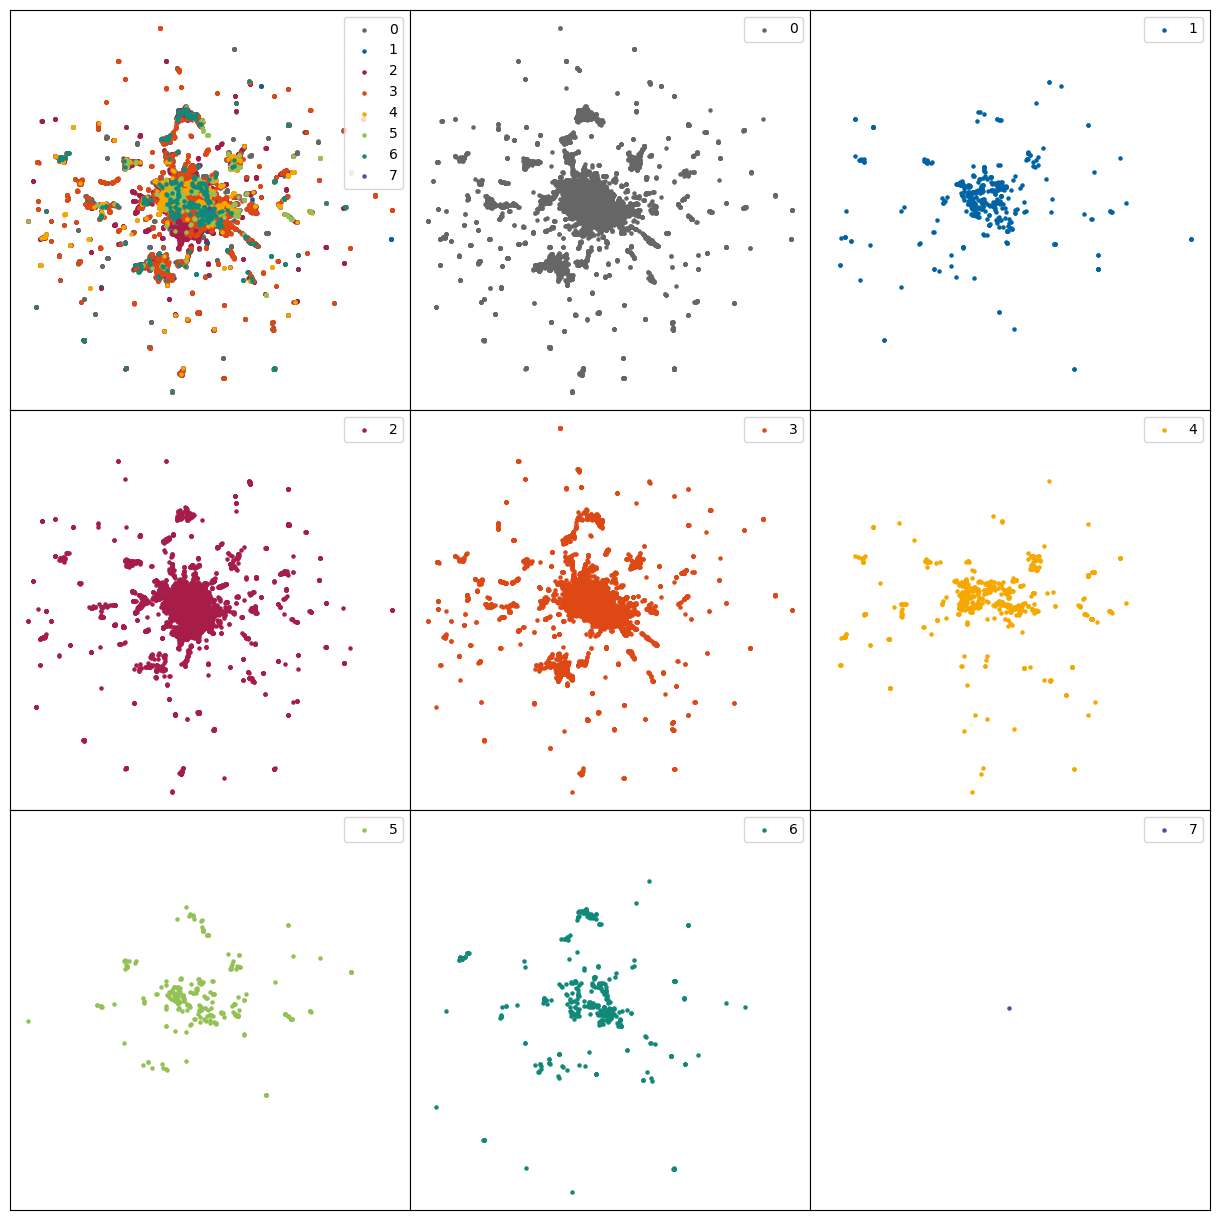

In [27]:
df = pd.read_csv("../data/Descriptors/ECFPs.csv")

df.replace("general-set","general set",inplace=True)
df.replace("refined-set","refined set",inplace=True)
df.replace("coreset","core set",inplace=True)

df_general = df[df["Settype"] == "general set"]
df_refined = df[df["Settype"] == "refined set"]
df_core = df[df["Settype"] == "core set"]

df.drop("Settype",inplace=True, axis=1)
df_general.drop("Settype",inplace=True, axis=1)
df_refined.drop("Settype",inplace=True, axis=1)
df_core.drop("Settype",inplace=True, axis=1)

df_1 = pd.read_csv("../data/exp_data/EC_numbers/1_x_x_x.csv")
df_2 = pd.read_csv("../data/exp_data/EC_numbers/2_x_x_x.csv")
df_3 = pd.read_csv("../data/exp_data/EC_numbers/3_x_x_x.csv")
df_4 = pd.read_csv("../data/exp_data/EC_numbers/4_x_x_x.csv")
df_5 = pd.read_csv("../data/exp_data/EC_numbers/5_x_x_x.csv")
df_6 = pd.read_csv("../data/exp_data/EC_numbers/6_x_x_x.csv")
df_7 = pd.read_csv("../data/exp_data/EC_numbers/7_x_x_x.csv")

lst = []

for pdb in df["PDB code"]:
    if pdb in df_1["PDB code"].values:
        lst.append(1)
    elif pdb in df_2["PDB code"].values:
        lst.append(2)
    elif pdb in df_3["PDB code"].values:
        lst.append(3)
    elif pdb in df_4["PDB code"].values:
        lst.append(4)
    elif pdb in df_5["PDB code"].values:
        lst.append(5)
    elif pdb in df_6["PDB code"].values:
        lst.append(6)
    elif pdb in df_7["PDB code"].values:
        lst.append(7)
    else:
        lst.append(0)

df["Class"] = lst

df.drop("PDB code",inplace=True, axis=1)

df_data = df.drop("Class",inplace=False,axis=1)

df_refined_data = df_refined.drop("PDB code",inplace=False,axis=1)
scaler = StandardScaler().fit(df_refined_data)

df_scaled = scaler.transform(df_data)

df_scaled = np.nan_to_num(df_scaled)

pca = PCA(n_components=35)
df_scaled = pca.fit_transform(df_scaled)

print("preprocessing DONE")

reducer =umap.UMAP(random_state=42)

reducer = reducer.fit(df_scaled)
points_all = reducer.fit_transform(df_scaled)
points_0 = points_all[df.Class == 0]
points_1 = points_all[df.Class == 1]
points_2 = points_all[df.Class == 2]
points_3 = points_all[df.Class == 3]
points_4 = points_all[df.Class == 4]
points_5 = points_all[df.Class == 5]
points_6 = points_all[df.Class == 6]
points_7 = points_all[df.Class == 7]
print(points_all.shape,points_0.shape,points_1.shape,points_2.shape,points_3.shape,points_4.shape,points_5.shape,points_6.shape,points_7.shape)
print("UMAP training DONE")

fig, axs = plt.subplots(3, 3, figsize=(12, 12),sharex=True,sharey=True,constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=0.0, h_pad=0.0, hspace=0.0, wspace=0.0)

# Plot all points
axs[0, 0].scatter(points_0[:, 0], points_0[:, 1], s=5, label="0", color="#666666", alpha=1)
axs[0, 0].scatter(points_1[:, 0], points_1[:, 1], s=5, label="1", color="#0063A6", alpha=1)
axs[0, 0].scatter(points_2[:, 0], points_2[:, 1], s=5, label="2", color="#A71C49", alpha=1)
axs[0, 0].scatter(points_3[:, 0], points_3[:, 1], s=5, label="3", color="#DD4814", alpha=1)
axs[0, 0].scatter(points_4[:, 0], points_4[:, 1], s=5, label="4", color="#F6A800", alpha=1)
axs[0, 0].scatter(points_5[:, 0], points_5[:, 1], s=5, label="5", color="#94C154", alpha=1)
axs[0, 0].scatter(points_6[:, 0], points_6[:, 1], s=5, label="6", color="#11897A", alpha=1)
axs[0, 0].scatter(points_7[:, 0], points_7[:, 1], s=5, label="7", color="#4B51A1", alpha=1)
axs[0, 0].legend(loc="best")

# Plot points_0
axs[0, 1].scatter(points_0[:, 0], points_0[:, 1], s=5, label="0", color="#666666", alpha=1)
axs[0, 1].legend(loc="best")

# Plot points_1
axs[0, 2].scatter(points_1[:, 0], points_1[:, 1], s=5, label="1", color="#0063A6", alpha=1)
axs[0, 2].legend(loc="best")

# Plot points_2
axs[1, 0].scatter(points_2[:, 0], points_2[:, 1], s=5, label="2", color="#A71C49", alpha=1)
axs[1, 0].legend(loc="best")

# Plot points_3
axs[1, 1].scatter(points_3[:, 0], points_3[:, 1], s=5, label="3", color="#DD4814", alpha=1)
axs[1, 1].legend(loc="best")

# Plot points_4
axs[1, 2].scatter(points_4[:, 0], points_4[:, 1], s=5, label="4", color="#F6A800", alpha=1)
axs[1, 2].legend(loc="best")

# Plot points_5
axs[2, 0].scatter(points_5[:, 0], points_5[:, 1], s=5, label="5", color="#94C154", alpha=1)
axs[2, 0].legend(loc="best")

# Plot points_6
axs[2, 1].scatter(points_6[:, 0], points_6[:, 1], s=5, label="6", color="#11897A", alpha=1)
axs[2, 1].legend(loc="best")

# Plot points_7
axs[2, 2].scatter(points_7[:, 0], points_7[:, 1], s=5, label="7", color="#4B51A1", alpha=1)
axs[2, 2].legend(loc="best")

for ax in axs:
    for a in ax:
        a.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
        
plt.show()

preprocessing DONE


/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP training DONE


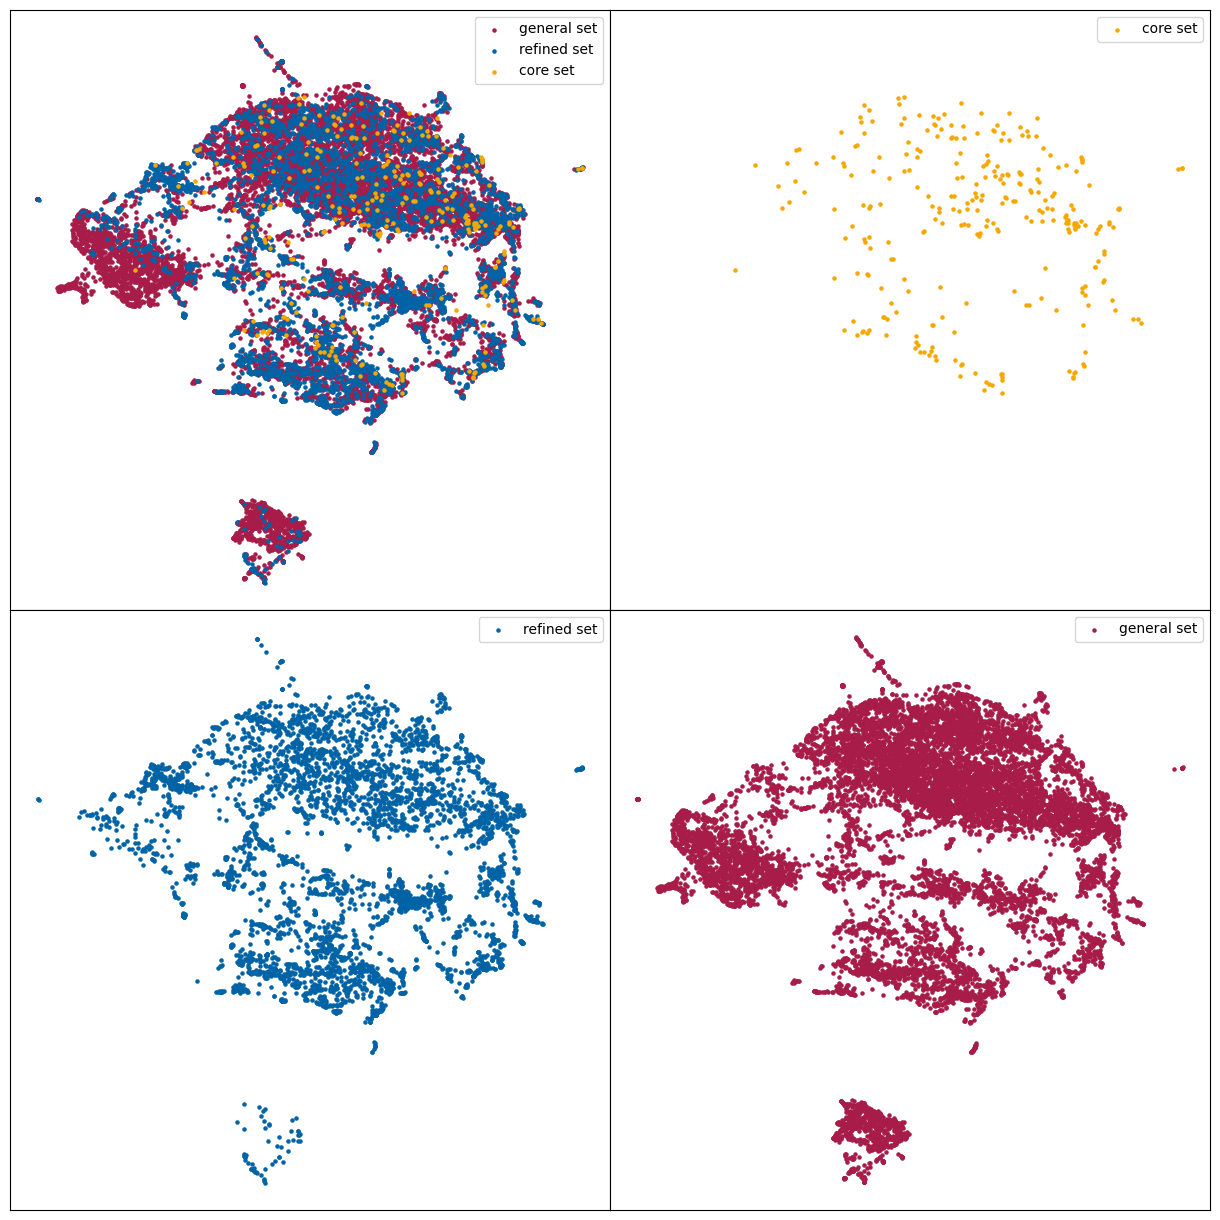

In [28]:
df = pd.read_csv("../data/Descriptors/DXGB.csv")
df.dropna(inplace=True)
PDBs_reduced = df["PDB code"]
df.drop("PDB code",inplace=True, axis=1)

df.replace("general-set","general set",inplace=True)
df.replace("refined-set","refined set",inplace=True)
df.replace("coreset","core set",inplace=True)

df_general = df[df["Settype"] == "general set"]
df_refined = df[df["Settype"] == "refined set"]
df_core = df[df["Settype"] == "core set"]

settype_reduced = df["Settype"]

df_data = df.drop("Settype",inplace=False,axis=1)
df_refined_data = df[df["Settype"] == "refined set"].drop("Settype",inplace=False,axis=1)

scaler = StandardScaler().fit(df_refined_data)

df_scaled = scaler.transform(df_data)

df_scaled = np.nan_to_num(df_scaled)

pca = PCA(n_components=35)
df_scaled = pca.fit_transform(df_scaled)

print("preprocessing DONE")

reducer =umap.UMAP(random_state=42)
reducer = reducer.fit(df_scaled)
points_all = reducer.fit_transform(df_scaled)
points_general = points_all[df.Settype == "general set"]
points_refined = points_all[df.Settype == "refined set"]
points_core = points_all[df.Settype == "core set"]
print("UMAP training DONE")
fig, axs = plt.subplots(2, 2, figsize=(12, 12),sharex=True,sharey=True,constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=0.0, h_pad=0.0, hspace=0.0, wspace=0.0)

# Plot all points
axs[0, 0].scatter(points_general[:, 0], points_general[:, 1], s=5, label="general set", color="#A71C49", alpha=1)
axs[0, 0].scatter(points_refined[:, 0], points_refined[:, 1], s=5, label="refined set", color="#0063A6", alpha=1)
axs[0, 0].scatter(points_core[:, 0], points_core[:, 1], s=5, label="core set", color="#F6A800", alpha=1)
axs[0, 0].legend(loc="best")

# Plot points_core
axs[0, 1].scatter(points_core[:, 0], points_core[:, 1], s=5, label="core set", color="#F6A800", alpha=1)
axs[0, 1].legend(loc="best")

# Plot points_refined
axs[1, 0].scatter(points_refined[:, 0], points_refined[:, 1], s=5, label="refined set", color="#0063A6", alpha=1)
axs[1, 0].legend(loc="best")

# Plot points_general
axs[1, 1].scatter(points_general[:, 0], points_general[:, 1], s=5, label="general set", color="#A71C49", alpha=1)
axs[1, 1].legend(loc="best")

for ax in axs:
    for a in ax:
        a.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

plt.show()

DXGB_x = points_all[:,0]
DXGB_y = points_all[:,1]

/tmp/ipykernel_34891/2069019148.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_general.drop("Settype",inplace=True, axis=1)
/tmp/ipykernel_34891/2069019148.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_refined.drop("Settype",inplace=True, axis=1)
/tmp/ipykernel_34891/2069019148.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_core.drop("Settype",inplace=True, axis=1)


preprocessing DONE


/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(18904, 2) (7976, 2) (450, 2) (4509, 2) (4550, 2) (726, 2) (291, 2) (401, 2) (1, 2)
UMAP training DONE


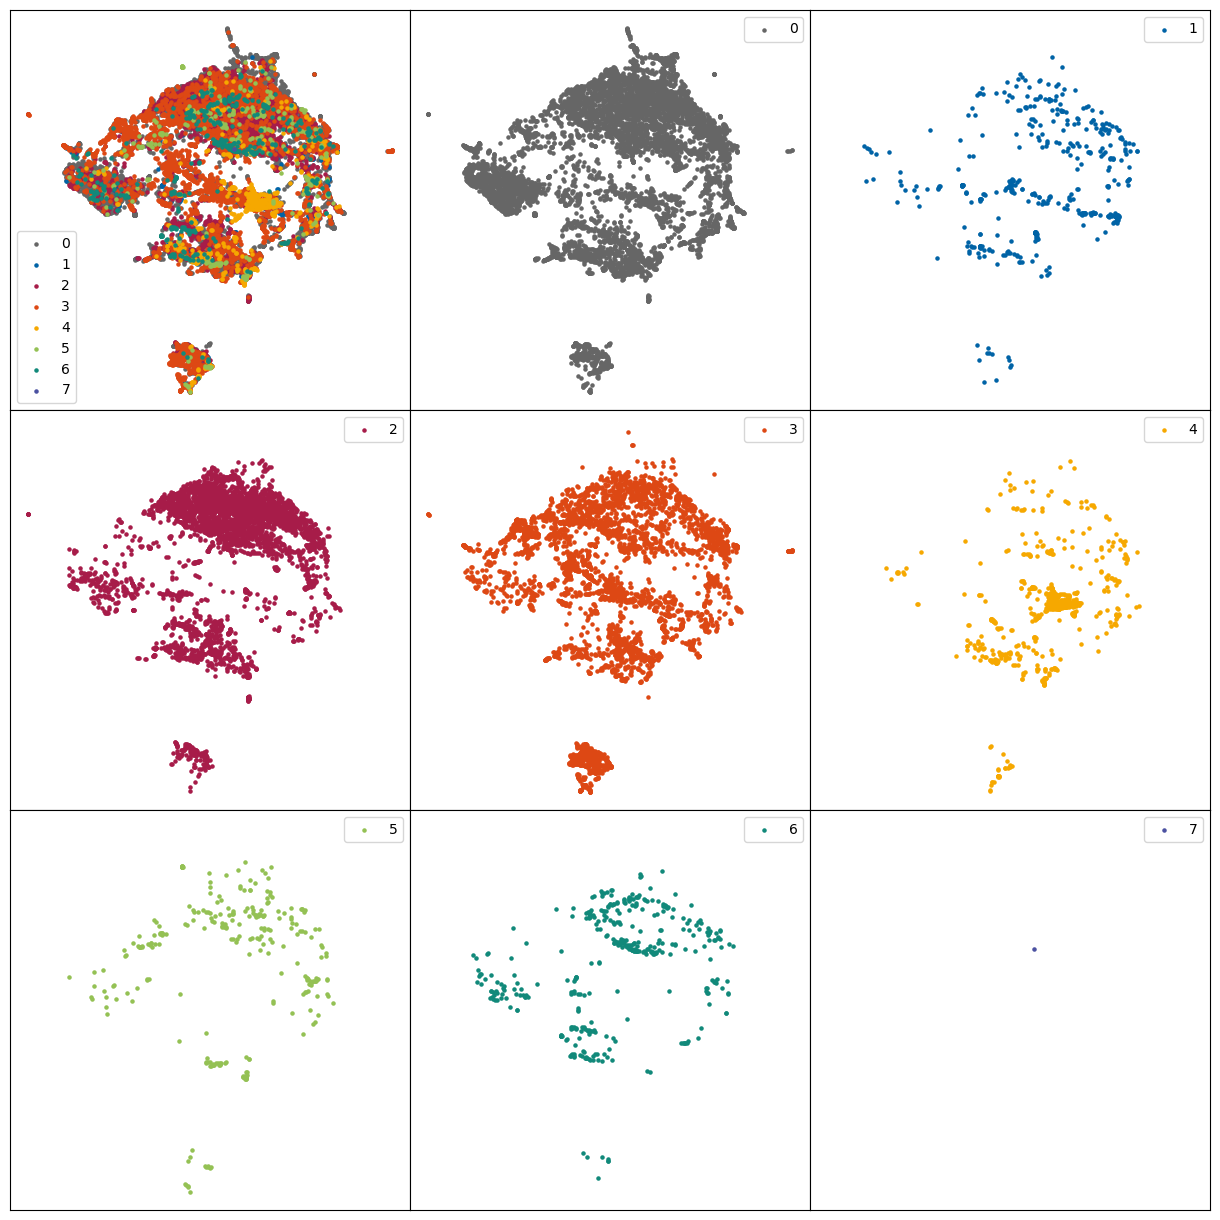

In [29]:
df = pd.read_csv("../data/Descriptors/DXGB.csv")

df_general = df[df["Settype"] == "general-set"]
df_refined = df[df["Settype"] == "refined-set"]
df_core = df[df["Settype"] == "coreset"]

df.drop("Settype",inplace=True, axis=1)
df_general.drop("Settype",inplace=True, axis=1)
df_refined.drop("Settype",inplace=True, axis=1)
df_core.drop("Settype",inplace=True, axis=1)

df_1 = pd.read_csv("../data/exp_data/EC_numbers/1_x_x_x.csv")
df_2 = pd.read_csv("../data/exp_data/EC_numbers/2_x_x_x.csv")
df_3 = pd.read_csv("../data/exp_data/EC_numbers/3_x_x_x.csv")
df_4 = pd.read_csv("../data/exp_data/EC_numbers/4_x_x_x.csv")
df_5 = pd.read_csv("../data/exp_data/EC_numbers/5_x_x_x.csv")
df_6 = pd.read_csv("../data/exp_data/EC_numbers/6_x_x_x.csv")
df_7 = pd.read_csv("../data/exp_data/EC_numbers/7_x_x_x.csv")

lst = []

for pdb in df["PDB code"]:
    if pdb in df_1["PDB code"].values:
        lst.append(1)
    elif pdb in df_2["PDB code"].values:
        lst.append(2)
    elif pdb in df_3["PDB code"].values:
        lst.append(3)
    elif pdb in df_4["PDB code"].values:
        lst.append(4)
    elif pdb in df_5["PDB code"].values:
        lst.append(5)
    elif pdb in df_6["PDB code"].values:
        lst.append(6)
    elif pdb in df_7["PDB code"].values:
        lst.append(7)
    else:
        lst.append(0)

df["Class"] = lst

df.drop("PDB code",inplace=True, axis=1)

df_data = df.drop("Class",inplace=False,axis=1)

df_refined_data = df_refined.drop("PDB code",inplace=False,axis=1)
scaler = StandardScaler().fit(df_refined_data)

df_scaled = scaler.transform(df_data)

df_scaled = np.nan_to_num(df_scaled)

pca = PCA(n_components=35)
df_scaled = pca.fit_transform(df_scaled)

print("preprocessing DONE")

reducer =umap.UMAP(random_state=42)

reducer = reducer.fit(df_scaled)
points_all = reducer.fit_transform(df_scaled)
points_0 = points_all[df.Class == 0]
points_1 = points_all[df.Class == 1]
points_2 = points_all[df.Class == 2]
points_3 = points_all[df.Class == 3]
points_4 = points_all[df.Class == 4]
points_5 = points_all[df.Class == 5]
points_6 = points_all[df.Class == 6]
points_7 = points_all[df.Class == 7]
print(points_all.shape,points_0.shape,points_1.shape,points_2.shape,points_3.shape,points_4.shape,points_5.shape,points_6.shape,points_7.shape)
print("UMAP training DONE")

fig, axs = plt.subplots(3, 3, figsize=(12, 12),sharex=True,sharey=True,constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=0.0, h_pad=0.0, hspace=0.0, wspace=0.0)

# Plot all points
axs[0, 0].scatter(points_0[:, 0], points_0[:, 1], s=5, label="0", color="#666666", alpha=1)
axs[0, 0].scatter(points_1[:, 0], points_1[:, 1], s=5, label="1", color="#0063A6", alpha=1)
axs[0, 0].scatter(points_2[:, 0], points_2[:, 1], s=5, label="2", color="#A71C49", alpha=1)
axs[0, 0].scatter(points_3[:, 0], points_3[:, 1], s=5, label="3", color="#DD4814", alpha=1)
axs[0, 0].scatter(points_4[:, 0], points_4[:, 1], s=5, label="4", color="#F6A800", alpha=1)
axs[0, 0].scatter(points_5[:, 0], points_5[:, 1], s=5, label="5", color="#94C154", alpha=1)
axs[0, 0].scatter(points_6[:, 0], points_6[:, 1], s=5, label="6", color="#11897A", alpha=1)
axs[0, 0].scatter(points_7[:, 0], points_7[:, 1], s=5, label="7", color="#4B51A1", alpha=1)
axs[0, 0].legend(loc="best")

# Plot points_0
axs[0, 1].scatter(points_0[:, 0], points_0[:, 1], s=5, label="0", color="#666666", alpha=1)
axs[0, 1].legend(loc="best")

# Plot points_1
axs[0, 2].scatter(points_1[:, 0], points_1[:, 1], s=5, label="1", color="#0063A6", alpha=1)
axs[0, 2].legend(loc="best")

# Plot points_2
axs[1, 0].scatter(points_2[:, 0], points_2[:, 1], s=5, label="2", color="#A71C49", alpha=1)
axs[1, 0].legend(loc="best")

# Plot points_3
axs[1, 1].scatter(points_3[:, 0], points_3[:, 1], s=5, label="3", color="#DD4814", alpha=1)
axs[1, 1].legend(loc="best")

# Plot points_4
axs[1, 2].scatter(points_4[:, 0], points_4[:, 1], s=5, label="4", color="#F6A800", alpha=1)
axs[1, 2].legend(loc="best")

# Plot points_5
axs[2, 0].scatter(points_5[:, 0], points_5[:, 1], s=5, label="5", color="#94C154", alpha=1)
axs[2, 0].legend(loc="best")

# Plot points_6
axs[2, 1].scatter(points_6[:, 0], points_6[:, 1], s=5, label="6", color="#11897A", alpha=1)
axs[2, 1].legend(loc="best")

# Plot points_7
axs[2, 2].scatter(points_7[:, 0], points_7[:, 1], s=5, label="7", color="#4B51A1", alpha=1)
axs[2, 2].legend(loc="best")

for ax in axs:
    for a in ax:
        a.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
        
plt.show()

---------------------------------------------------------------
PL-REX

---------------------------------------------------------------

Preprocessing DONE


/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP training DONE


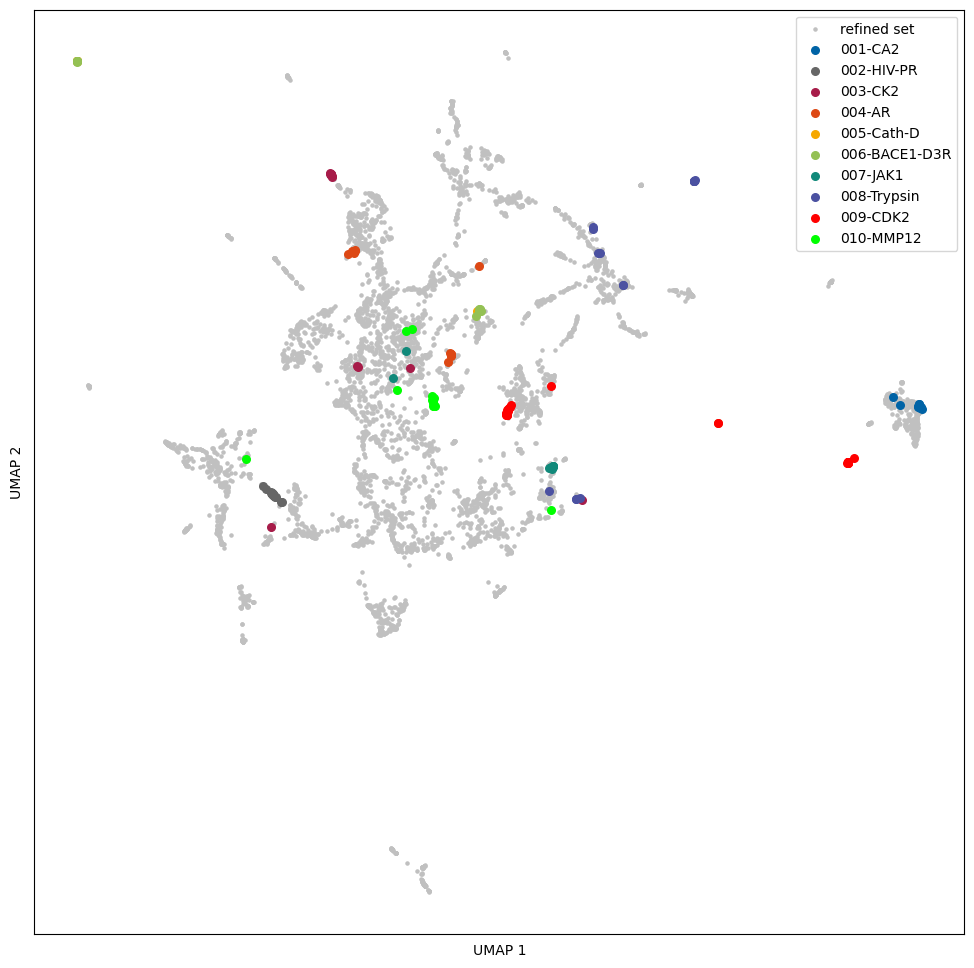

In [14]:
# # X-GRADE descriptors
# # Load and preprocess data
# df_refined = pd.read_csv("../data/Descriptors/PDBbind_refined_set_X-GRADE.csv")
# df_refined.drop("PDB code", inplace=True, axis=1)
# df_refined["Settype"] = "refined set"

# df_001 = pd.read_csv("/data/shared/datasets/PL-REX/001-CA2/structures_pl-rex/X-GRADE.csv")
# df_001.drop("PDB code", inplace=True, axis=1)
# df_001["Settype"] = "001-CA2"

# df_002 = pd.read_csv("/data/shared/datasets/PL-REX/002-HIV-PR/structures_pl-rex/X-GRADE.csv")
# df_002.drop("PDB code", inplace=True, axis=1)
# df_002["Settype"] = "002-HIV-PR"

# df_003 = pd.read_csv("/data/shared/datasets/PL-REX/003-CK2/structures_pl-rex/X-GRADE.csv")
# df_003.drop("PDB code", inplace=True, axis=1)
# df_003["Settype"] = "003-CK2"

# df_004 = pd.read_csv("/data/shared/datasets/PL-REX/004-AR/structures_pl-rex/X-GRADE.csv")
# df_004.drop("PDB code", inplace=True, axis=1)
# df_004["Settype"] = "004-AR"

# df_005 = pd.read_csv("/data/shared/datasets/PL-REX/005-Cath-D/structures_pl-rex/X-GRADE.csv")
# df_005.drop("PDB code", inplace=True, axis=1)
# df_005["Settype"] = "005-Cath-D"

# df_006 = pd.read_csv("/data/shared/datasets/PL-REX/006-BACE1-D3R/structures_pl-rex/X-GRADE.csv")
# df_006.drop("PDB code", inplace=True, axis=1)
# df_006["Settype"] = "006-BACE1-D3R"

# df_007 = pd.read_csv("/data/shared/datasets/PL-REX/007-JAK1/structures_pl-rex/X-GRADE.csv")
# df_007.drop("PDB code", inplace=True, axis=1)
# df_007["Settype"] = "007-JAK1"

# df_008 = pd.read_csv("/data/shared/datasets/PL-REX/008-Trypsin/structures_pl-rex/X-GRADE.csv")
# df_008.drop("PDB code", inplace=True, axis=1)
# df_008["Settype"] = "008-Trypsin"

# df_009 = pd.read_csv("/data/shared/datasets/PL-REX/009-CDK2/structures_pl-rex/X-GRADE.csv")
# df_009.drop("PDB code", inplace=True, axis=1)
# df_009["Settype"] = "009-CDK2"

# df_010 = pd.read_csv("/data/shared/datasets/PL-REX/010-MMP12/structures_pl-rex/X-GRADE.csv")
# df_010.drop("PDB code", inplace=True, axis=1)
# df_010["Settype"] = "010-MMP12"

# dataframes = [df_refined, df_001, df_002, df_003, df_004, df_005, df_006, df_007, df_008, df_009, df_010]
# df = pd.concat(dataframes)

# # Separate data and set type
# df_data = df.drop("Settype", inplace=False, axis=1)
# df_refined_data = df_refined.drop("Settype", inplace=False, axis=1)

# # Standardize the data
# scaler = StandardScaler().fit(df_refined_data)
# df_scaled = scaler.transform(df_data)
# df_scaled = np.nan_to_num(df_scaled)

# pca = PCA(n_components=35)
# df_scaled = pca.fit_transform(df_scaled)

# print("Preprocessing DONE")

# # Apply UMAP
# reducer = umap.UMAP(random_state=42)
# points_all = reducer.fit_transform(df_scaled)
# print("UMAP training DONE")

# # Convert Settype column to a category
# df["Settype"] = df["Settype"].astype('category')
# categories = df["Settype"].cat.categories
# colors = ["#0063A6", "#666666", "#A71C49", "#DD4814", "#F6A800", "#94C154", "#11897A", "#4B51A1", "#FF0000", "#00FF00", "#D3D3D3"]

# # Plot UMAP
# plt.figure(figsize=(12, 12))

# # Plot refined set in the background
# subset_refined = points_all[df["Settype"] == "refined set"]
# plt.scatter(subset_refined[:, 0], subset_refined[:, 1], s=5, label="refined set", color="#C0C0C0", alpha=1)

# # Plot all other sets on top
# for i, category in enumerate(categories):
#     if category != "refined set":
#         subset = points_all[df["Settype"] == category]
#         plt.scatter(subset[:, 0], subset[:, 1], s=30, label=category, color=colors[i], alpha=1)

# # plt.title("UMAP projection of the PL-REX dataset in comparison to the PDBbind refined set using X-GRADE descriptors")
# plt.xticks([])
# plt.yticks([])
# plt.xlabel("UMAP 1")
# plt.ylabel("UMAP 2")
# plt.legend(loc="best")
# plt.show()



Preprocessing DONE


/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP training DONE


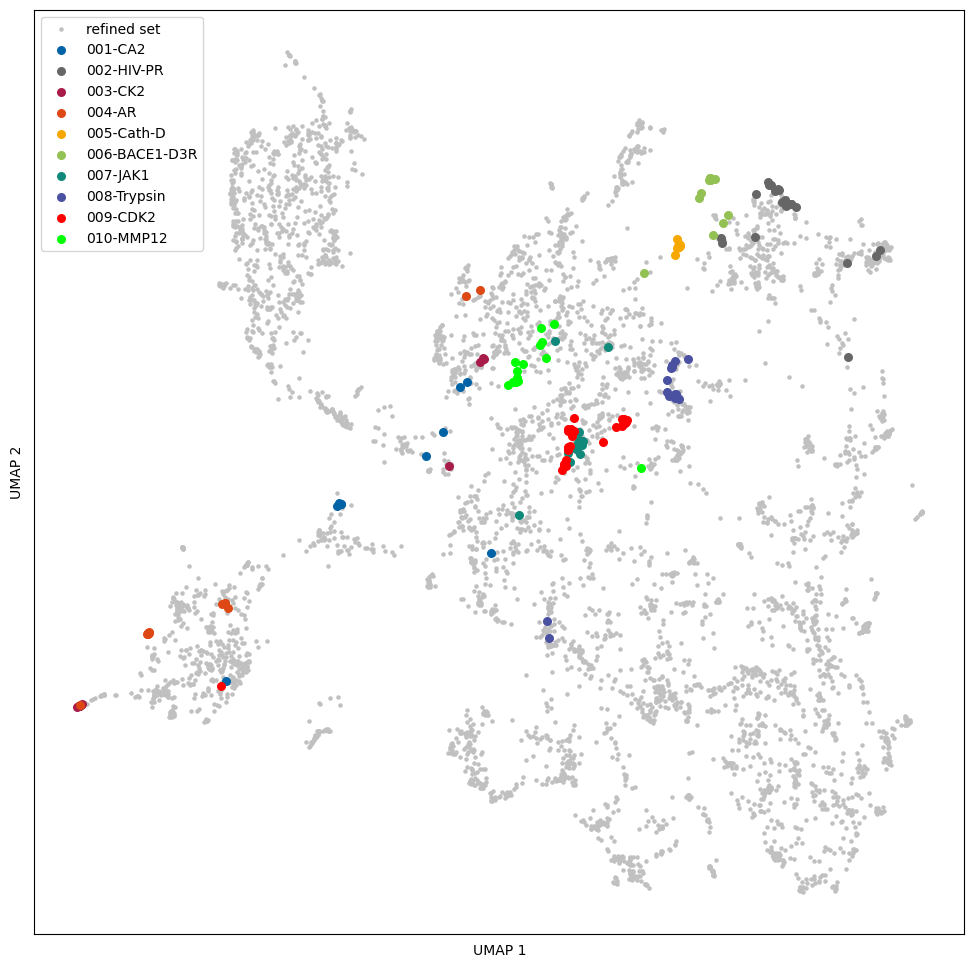

In [15]:
# # GRADE descriptors
# # Load and preprocess data
# df_refined = pd.read_csv("../data/Descriptors/PDBbind_refined_set_GRADE.csv")
# df_refined.drop("PDB code", inplace=True, axis=1)
# df_refined["Settype"] = "refined set"

# df_001 = pd.read_csv("/data/shared/datasets/PL-REX/001-CA2/structures_pl-rex/GRADE.csv")
# df_001.drop("PDB code", inplace=True, axis=1)
# df_001["Settype"] = "001-CA2"

# df_002 = pd.read_csv("/data/shared/datasets/PL-REX/002-HIV-PR/structures_pl-rex/GRADE.csv")
# df_002.drop("PDB code", inplace=True, axis=1)
# df_002["Settype"] = "002-HIV-PR"

# df_003 = pd.read_csv("/data/shared/datasets/PL-REX/003-CK2/structures_pl-rex/GRADE.csv")
# df_003.drop("PDB code", inplace=True, axis=1)
# df_003["Settype"] = "003-CK2"

# df_004 = pd.read_csv("/data/shared/datasets/PL-REX/004-AR/structures_pl-rex/GRADE.csv")
# df_004.drop("PDB code", inplace=True, axis=1)
# df_004["Settype"] = "004-AR"

# df_005 = pd.read_csv("/data/shared/datasets/PL-REX/005-Cath-D/structures_pl-rex/GRADE.csv")
# df_005.drop("PDB code", inplace=True, axis=1)
# df_005["Settype"] = "005-Cath-D"

# df_006 = pd.read_csv("/data/shared/datasets/PL-REX/006-BACE1-D3R/structures_pl-rex/GRADE.csv")
# df_006.drop("PDB code", inplace=True, axis=1)
# df_006["Settype"] = "006-BACE1-D3R"

# df_007 = pd.read_csv("/data/shared/datasets/PL-REX/007-JAK1/structures_pl-rex/GRADE.csv")
# df_007.drop("PDB code", inplace=True, axis=1)
# df_007["Settype"] = "007-JAK1"

# df_008 = pd.read_csv("/data/shared/datasets/PL-REX/008-Trypsin/structures_pl-rex/GRADE.csv")
# df_008.drop("PDB code", inplace=True, axis=1)
# df_008["Settype"] = "008-Trypsin"

# df_009 = pd.read_csv("/data/shared/datasets/PL-REX/009-CDK2/structures_pl-rex/GRADE.csv")
# df_009.drop("PDB code", inplace=True, axis=1)
# df_009["Settype"] = "009-CDK2"

# df_010 = pd.read_csv("/data/shared/datasets/PL-REX/010-MMP12/structures_pl-rex/GRADE.csv")
# df_010.drop("PDB code", inplace=True, axis=1)
# df_010["Settype"] = "010-MMP12"

# dataframes = [df_refined, df_001, df_002, df_003, df_004, df_005, df_006, df_007, df_008, df_009, df_010]
# df = pd.concat(dataframes)

# # Separate data and set type
# df_data = df.drop("Settype", inplace=False, axis=1)
# df_refined_data = df_refined.drop("Settype", inplace=False, axis=1)

# # Standardize the data
# scaler = StandardScaler().fit(df_refined_data)
# df_scaled = scaler.transform(df_data)
# df_scaled = np.nan_to_num(df_scaled)
# print("Preprocessing DONE")

# # Apply UMAP
# reducer = umap.UMAP(random_state=42)
# points_all = reducer.fit_transform(df_scaled)
# print("UMAP training DONE")

# # Convert Settype column to a category
# df["Settype"] = df["Settype"].astype('category')
# categories = df["Settype"].cat.categories
# colors = ["#0063A6", "#666666", "#A71C49", "#DD4814", "#F6A800", "#94C154", "#11897A", "#4B51A1", "#FF0000", "#00FF00", "#D3D3D3"]

# # Plot UMAP
# plt.figure(figsize=(12, 12))

# # Plot refined set in the background
# subset_refined = points_all[df["Settype"] == "refined set"]
# plt.scatter(subset_refined[:, 0], subset_refined[:, 1], s=5, label="refined set", color="#C0C0C0", alpha=1)

# # Plot all other sets on top
# for i, category in enumerate(categories):
#     if category != "refined set":
#         subset = points_all[df["Settype"] == category]
#         plt.scatter(subset[:, 0], subset[:, 1], s=30, label=category, color=colors[i], alpha=1)

# # plt.title("UMAP projection of the PL-REX dataset in comparison to the PDBbind refined set using GRADE descriptors")
# plt.xticks([])
# plt.yticks([])
# plt.xlabel("UMAP 1")
# plt.ylabel("UMAP 2")
# plt.legend(loc="best")
# plt.show()



-------------------------------------------
t-SNE

-------------------------------------------

preprocessing DONE


/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


t-SNE training DONE


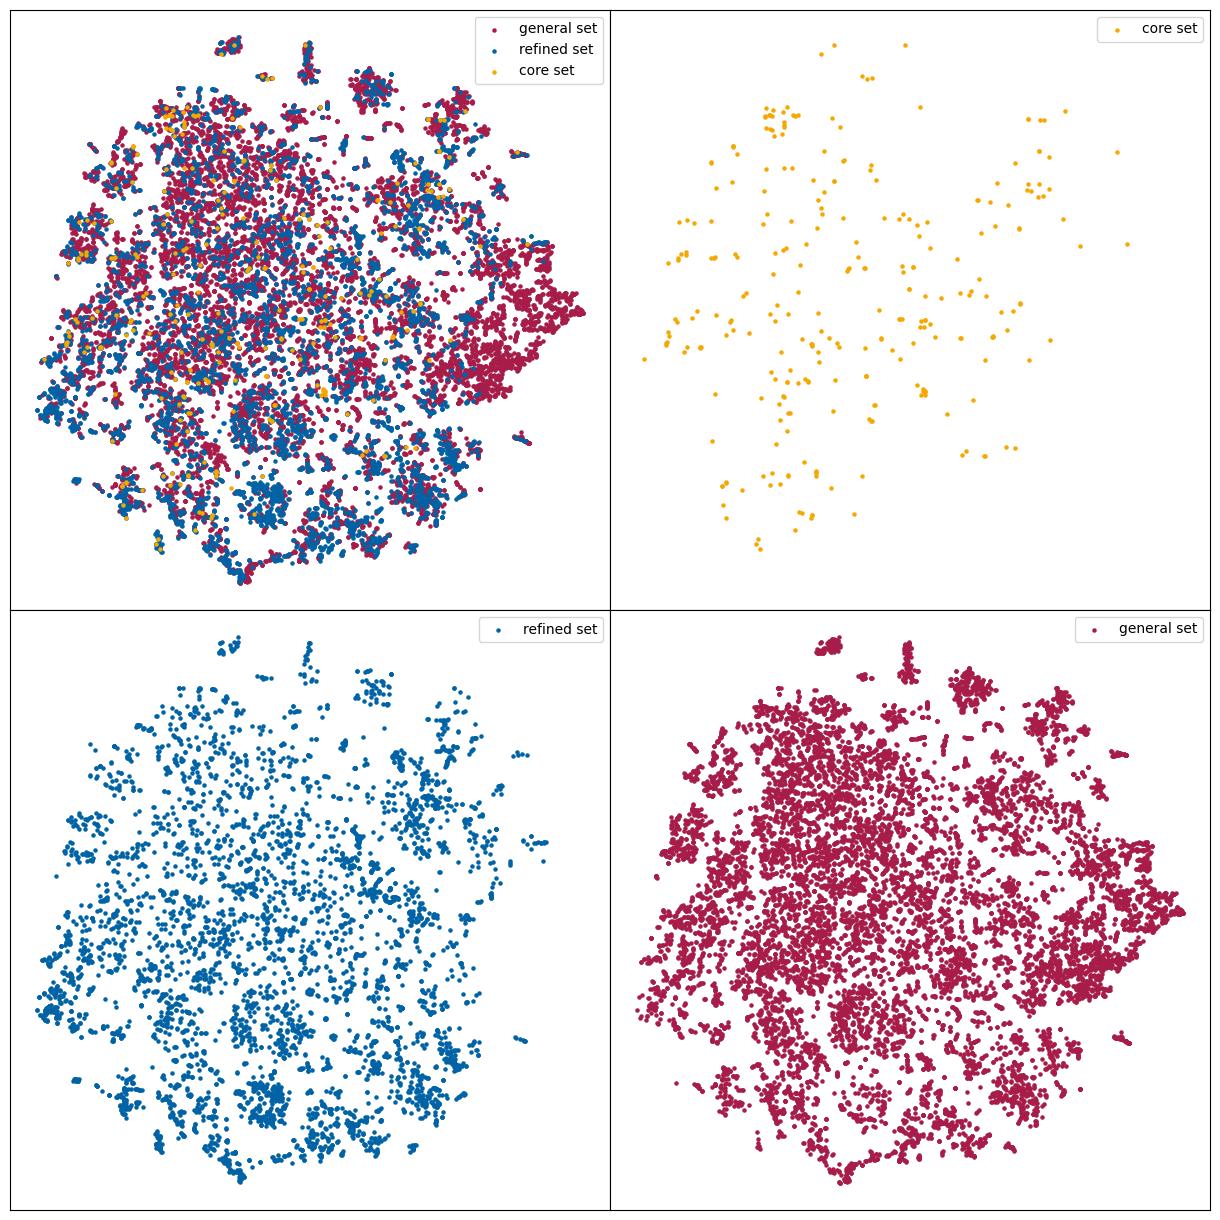

In [16]:
# X-GRADE descriptors
df_general = pd.read_csv("../data/Descriptors/PDBbind_general_set_X-GRADE.csv")
df_general.drop("PDB code",inplace=True, axis=1)
df_general["Settype"] = "general set"
df_refined = pd.read_csv("../data/Descriptors/PDBbind_refined_set_X-GRADE.csv")
df_refined.drop("PDB code",inplace=True, axis=1)
df_refined["Settype"] = "refined set"
df_core = pd.read_csv("../data/Descriptors/PDBbind_core_set_X-GRADE.csv")
df_core.drop("PDB code",inplace=True, axis=1)
df_core["Settype"] = "core set"

dataframes = [df_general,df_refined,df_core]
df = pd.concat(dataframes)

df_data = df.drop("Settype",inplace=False,axis=1)

df_refined_data = df_refined.drop("Settype",inplace=False,axis=1)
df_core_data = df_core.drop("Settype",inplace=False,axis=1)
df_general_data = df_general.drop("Settype",inplace=False,axis=1)
scaler = StandardScaler().fit(df_refined_data)

df_scaled = scaler.transform(df_data)

df_scaled = np.nan_to_num(df_scaled)

pca = PCA(n_components=35)
df_scaled = pca.fit_transform(df_scaled)

print("preprocessing DONE")

reducer = TSNE(n_components=2)

points_all = reducer.fit_transform(df_scaled)
points_general = points_all[df.Settype == "general set"]
points_refined = points_all[df.Settype == "refined set"]
points_core = points_all[df.Settype == "core set"]
print("t-SNE training DONE")

# Plot t-SNE
fig, axs = plt.subplots(2, 2, figsize=(12, 12),sharex=True,sharey=True,constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=0.0, h_pad=0.0, hspace=0.0, wspace=0.0)

# Plot all points
axs[0, 0].scatter(points_general[:, 0], points_general[:, 1], s=5, label="general set", color="#A71C49", alpha=1)
axs[0, 0].scatter(points_refined[:, 0], points_refined[:, 1], s=5, label="refined set", color="#0063A6", alpha=1)
axs[0, 0].scatter(points_core[:, 0], points_core[:, 1], s=5, label="core set", color="#F6A800", alpha=1)
axs[0, 0].legend(loc="best")

# Plot points_core
axs[0, 1].scatter(points_core[:, 0], points_core[:, 1], s=5, label="core set", color="#F6A800", alpha=1)
axs[0, 1].legend(loc="best")

# Plot points_refined
axs[1, 0].scatter(points_refined[:, 0], points_refined[:, 1], s=5, label="refined set", color="#0063A6", alpha=1)
axs[1, 0].legend(loc="best")

# Plot points_general
axs[1, 1].scatter(points_general[:, 0], points_general[:, 1], s=5, label="general set", color="#A71C49", alpha=1)
axs[1, 1].legend(loc="best")

for ax in axs:
    for a in ax:
        a.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
        
plt.show()


preprocessing DONE


/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


t-SNE training DONE


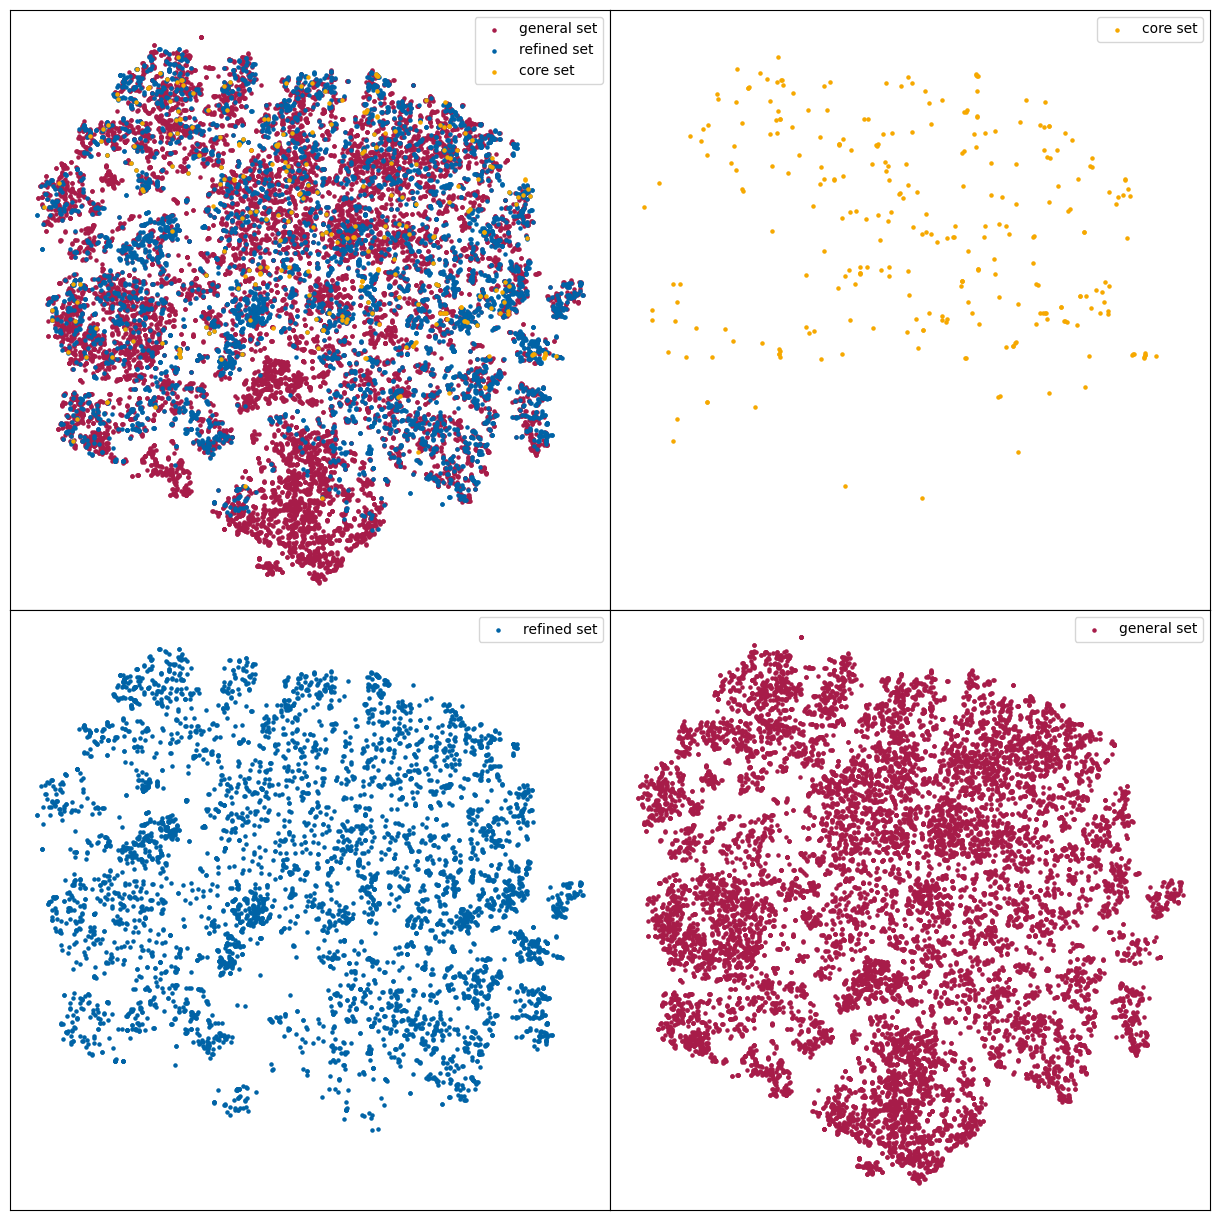

In [17]:
# GRADE descriptors
df_general = pd.read_csv("../data/Descriptors/PDBbind_general_set_GRADE.csv")
df_general.drop("PDB code",inplace=True, axis=1)
df_general["Settype"] = "general set"
df_refined = pd.read_csv("../data/Descriptors/PDBbind_refined_set_GRADE.csv")
df_refined.drop("PDB code",inplace=True, axis=1)
df_refined["Settype"] = "refined set"
df_core = pd.read_csv("../data/Descriptors/PDBbind_core_set_GRADE.csv")
df_core.drop("PDB code",inplace=True, axis=1)
df_core["Settype"] = "core set"

dataframes = [df_general,df_refined,df_core]
df = pd.concat(dataframes)

df_data = df.drop("Settype",inplace=False,axis=1)

df_refined_data = df_refined.drop("Settype",inplace=False,axis=1)
df_core_data = df_core.drop("Settype",inplace=False,axis=1)
df_general_data = df_general.drop("Settype",inplace=False,axis=1)
scaler = StandardScaler().fit(df_refined_data)

df_scaled = scaler.transform(df_data)

df_scaled = np.nan_to_num(df_scaled)

print("preprocessing DONE")

reducer = TSNE(n_components=2)

points_all = reducer.fit_transform(df_scaled)
points_general = points_all[df.Settype == "general set"]
points_refined = points_all[df.Settype == "refined set"]
points_core = points_all[df.Settype == "core set"]
print("t-SNE training DONE")

# Plot t-SNE
fig, axs = plt.subplots(2, 2, figsize=(12, 12),sharex=True,sharey=True,constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=0.0, h_pad=0.0, hspace=0.0, wspace=0.0)

# Plot all points
axs[0, 0].scatter(points_general[:, 0], points_general[:, 1], s=5, label="general set", color="#A71C49", alpha=1)
axs[0, 0].scatter(points_refined[:, 0], points_refined[:, 1], s=5, label="refined set", color="#0063A6", alpha=1)
axs[0, 0].scatter(points_core[:, 0], points_core[:, 1], s=5, label="core set", color="#F6A800", alpha=1)
axs[0, 0].legend(loc="best")

# Plot points_core
axs[0, 1].scatter(points_core[:, 0], points_core[:, 1], s=5, label="core set", color="#F6A800", alpha=1)
axs[0, 1].legend(loc="best")

# Plot points_refined
axs[1, 0].scatter(points_refined[:, 0], points_refined[:, 1], s=5, label="refined set", color="#0063A6", alpha=1)
axs[1, 0].legend(loc="best")

# Plot points_general
axs[1, 1].scatter(points_general[:, 0], points_general[:, 1], s=5, label="general set", color="#A71C49", alpha=1)
axs[1, 1].legend(loc="best")

for ax in axs:
    for a in ax:
        a.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
        
plt.show()

preprocessing DONE


/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(19727, 2) (8141, 2) (460, 2) (4718, 2) (4914, 2) (772, 2) (295, 2) (426, 2) (1, 2)
t-SNE training DONE


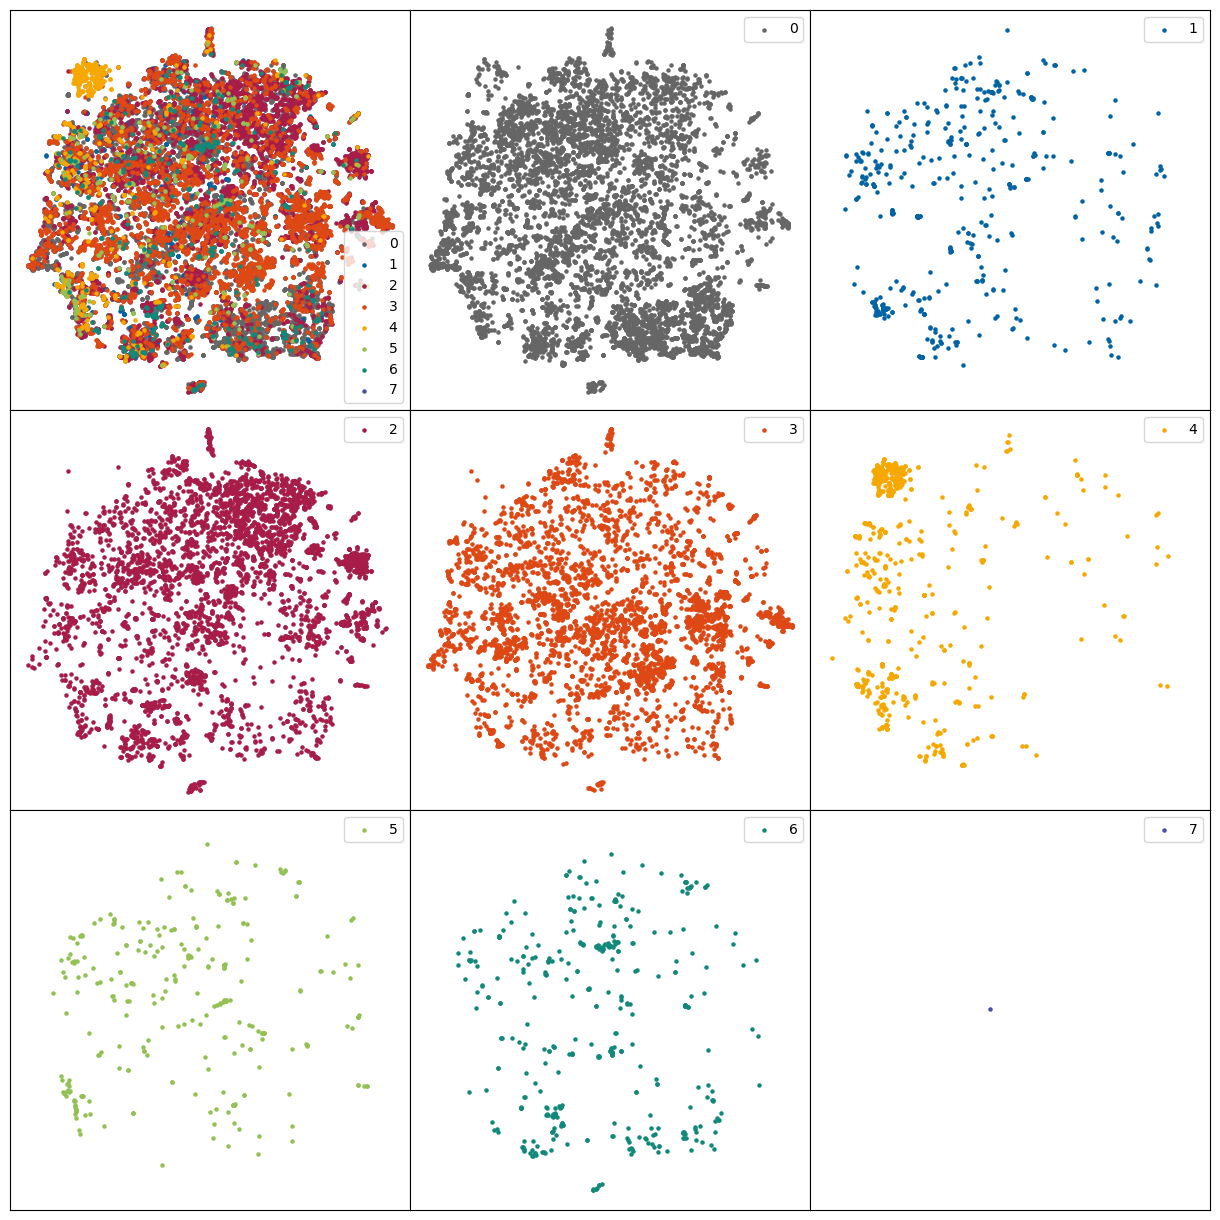

In [18]:
# X-GRADE descriptors
df_general = pd.read_csv("../data/Descriptors/PDBbind_general_set_X-GRADE.csv")
df_refined = pd.read_csv("../data/Descriptors/PDBbind_refined_set_X-GRADE.csv")
df_core = pd.read_csv("../data/Descriptors/PDBbind_core_set_X-GRADE.csv")

dataframes = [df_general,df_refined,df_core]
df = pd.concat(dataframes)

df_1 = pd.read_csv("../data/exp_data/EC_numbers/1_x_x_x.csv")
df_2 = pd.read_csv("../data/exp_data/EC_numbers/2_x_x_x.csv")
df_3 = pd.read_csv("../data/exp_data/EC_numbers/3_x_x_x.csv")
df_4 = pd.read_csv("../data/exp_data/EC_numbers/4_x_x_x.csv")
df_5 = pd.read_csv("../data/exp_data/EC_numbers/5_x_x_x.csv")
df_6 = pd.read_csv("../data/exp_data/EC_numbers/6_x_x_x.csv")
df_7 = pd.read_csv("../data/exp_data/EC_numbers/7_x_x_x.csv")

lst = []

for pdb in df["PDB code"]:
    if pdb in df_1["PDB code"].values:
        lst.append(1)
    elif pdb in df_2["PDB code"].values:
        lst.append(2)
    elif pdb in df_3["PDB code"].values:
        lst.append(3)
    elif pdb in df_4["PDB code"].values:
        lst.append(4)
    elif pdb in df_5["PDB code"].values:
        lst.append(5)
    elif pdb in df_6["PDB code"].values:
        lst.append(6)
    elif pdb in df_7["PDB code"].values:
        lst.append(7)
    else:
        lst.append(0)

df["Class"] = lst

df.drop("PDB code",inplace=True, axis=1)

df_data = df.drop("Class",inplace=False,axis=1)

df_refined_data = df_refined.drop("PDB code",inplace=False,axis=1)
scaler = StandardScaler().fit(df_refined_data)

df_scaled = scaler.transform(df_data)

df_scaled = np.nan_to_num(df_scaled)

pca = PCA(n_components=35)
df_scaled = pca.fit_transform(df_scaled)

print("preprocessing DONE")

reducer =TSNE(n_components=2)

reducer = reducer.fit(df_scaled)
points_all = reducer.fit_transform(df_scaled)
points_0 = points_all[df.Class == 0]
points_1 = points_all[df.Class == 1]
points_2 = points_all[df.Class == 2]
points_3 = points_all[df.Class == 3]
points_4 = points_all[df.Class == 4]
points_5 = points_all[df.Class == 5]
points_6 = points_all[df.Class == 6]
points_7 = points_all[df.Class == 7]
print(points_all.shape,points_0.shape,points_1.shape,points_2.shape,points_3.shape,points_4.shape,points_5.shape,points_6.shape,points_7.shape)
print("t-SNE training DONE")

# Plot t-SNE
fig, axs = plt.subplots(3, 3, figsize=(12, 12),sharex=True,sharey=True,constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=0.0, h_pad=0.0, hspace=0.0, wspace=0.0)

# Plot all points
axs[0, 0].scatter(points_0[:, 0], points_0[:, 1], s=5, label="0", color="#666666", alpha=1)
axs[0, 0].scatter(points_1[:, 0], points_1[:, 1], s=5, label="1", color="#0063A6", alpha=1)
axs[0, 0].scatter(points_2[:, 0], points_2[:, 1], s=5, label="2", color="#A71C49", alpha=1)
axs[0, 0].scatter(points_3[:, 0], points_3[:, 1], s=5, label="3", color="#DD4814", alpha=1)
axs[0, 0].scatter(points_4[:, 0], points_4[:, 1], s=5, label="4", color="#F6A800", alpha=1)
axs[0, 0].scatter(points_5[:, 0], points_5[:, 1], s=5, label="5", color="#94C154", alpha=1)
axs[0, 0].scatter(points_6[:, 0], points_6[:, 1], s=5, label="6", color="#11897A", alpha=1)
axs[0, 0].scatter(points_7[:, 0], points_7[:, 1], s=5, label="7", color="#4B51A1", alpha=1)
axs[0, 0].legend(loc="best")

# Plot points_0
axs[0, 1].scatter(points_0[:, 0], points_0[:, 1], s=5, label="0", color="#666666", alpha=1)
axs[0, 1].legend(loc="best")

# Plot points_1
axs[0, 2].scatter(points_1[:, 0], points_1[:, 1], s=5, label="1", color="#0063A6", alpha=1)
axs[0, 2].legend(loc="best")

# Plot points_2
axs[1, 0].scatter(points_2[:, 0], points_2[:, 1], s=5, label="2", color="#A71C49", alpha=1)
axs[1, 0].legend(loc="best")

# Plot points_3
axs[1, 1].scatter(points_3[:, 0], points_3[:, 1], s=5, label="3", color="#DD4814", alpha=1)
axs[1, 1].legend(loc="best")

# Plot points_4
axs[1, 2].scatter(points_4[:, 0], points_4[:, 1], s=5, label="4", color="#F6A800", alpha=1)
axs[1, 2].legend(loc="best")

# Plot points_5
axs[2, 0].scatter(points_5[:, 0], points_5[:, 1], s=5, label="5", color="#94C154", alpha=1)
axs[2, 0].legend(loc="best")

# Plot points_6
axs[2, 1].scatter(points_6[:, 0], points_6[:, 1], s=5, label="6", color="#11897A", alpha=1)
axs[2, 1].legend(loc="best")

# Plot points_7
axs[2, 2].scatter(points_7[:, 0], points_7[:, 1], s=5, label="7", color="#4B51A1", alpha=1)
axs[2, 2].legend(loc="best")

for ax in axs:
    for a in ax:
        a.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
        
plt.show()

preprocessing DONE


/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(19727, 2) (8141, 2) (460, 2) (4718, 2) (4914, 2) (772, 2) (295, 2) (426, 2) (1, 2)
t-SNE training DONE


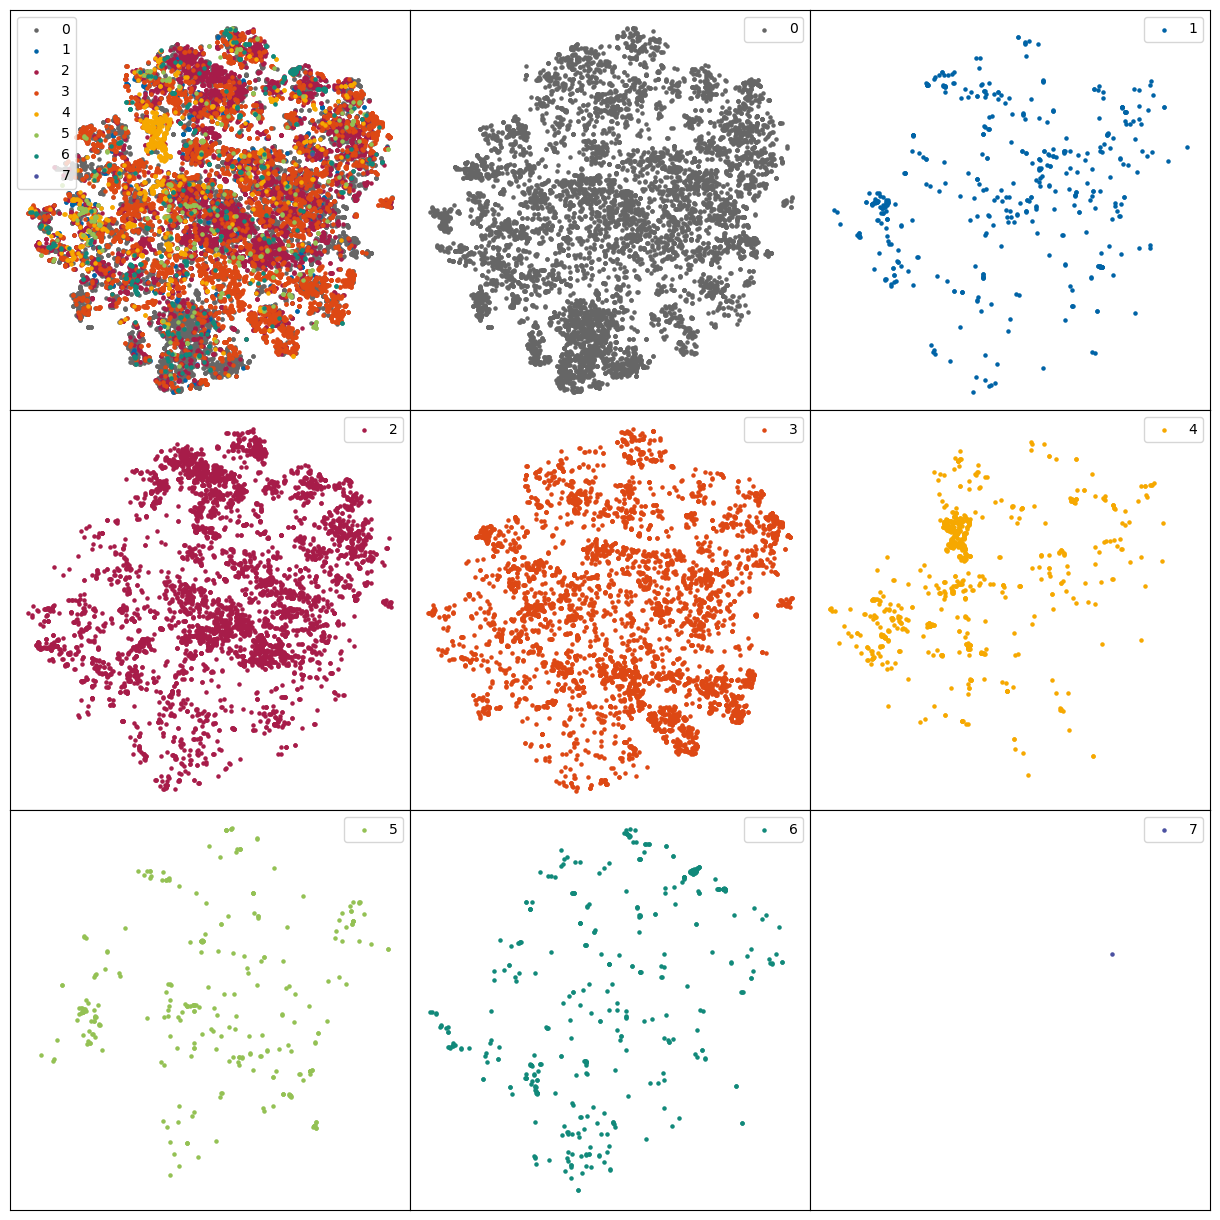

In [31]:
# GRADE descriptors
df_general = pd.read_csv("../data/Descriptors/PDBbind_general_set_GRADE.csv")
df_refined = pd.read_csv("../data/Descriptors/PDBbind_refined_set_GRADE.csv")
df_core = pd.read_csv("../data/Descriptors/PDBbind_core_set_GRADE.csv")

dataframes = [df_general,df_refined,df_core]
df = pd.concat(dataframes)

df_1 = pd.read_csv("../data/exp_data/EC_numbers/1_x_x_x.csv")
df_2 = pd.read_csv("../data/exp_data/EC_numbers/2_x_x_x.csv")
df_3 = pd.read_csv("../data/exp_data/EC_numbers/3_x_x_x.csv")
df_4 = pd.read_csv("../data/exp_data/EC_numbers/4_x_x_x.csv")
df_5 = pd.read_csv("../data/exp_data/EC_numbers/5_x_x_x.csv")
df_6 = pd.read_csv("../data/exp_data/EC_numbers/6_x_x_x.csv")
df_7 = pd.read_csv("../data/exp_data/EC_numbers/7_x_x_x.csv")

lst = []

for pdb in df["PDB code"]:
    if pdb in df_1["PDB code"].values:
        lst.append(1)
    elif pdb in df_2["PDB code"].values:
        lst.append(2)
    elif pdb in df_3["PDB code"].values:
        lst.append(3)
    elif pdb in df_4["PDB code"].values:
        lst.append(4)
    elif pdb in df_5["PDB code"].values:
        lst.append(5)
    elif pdb in df_6["PDB code"].values:
        lst.append(6)
    elif pdb in df_7["PDB code"].values:
        lst.append(7)
    else:
        lst.append(0)

df["Class"] = lst

df.drop("PDB code",inplace=True, axis=1)

df_data = df.drop("Class",inplace=False,axis=1)

df_refined_data = df_refined.drop("PDB code",inplace=False,axis=1)
scaler = StandardScaler().fit(df_refined_data)

df_scaled = scaler.transform(df_data)

df_scaled = np.nan_to_num(df_scaled)
print("preprocessing DONE")

reducer = TSNE(n_components=2)

reducer = reducer.fit(df_scaled)
points_all = reducer.fit_transform(df_scaled)
points_0 = points_all[df.Class == 0]
points_1 = points_all[df.Class == 1]
points_2 = points_all[df.Class == 2]
points_3 = points_all[df.Class == 3]
points_4 = points_all[df.Class == 4]
points_5 = points_all[df.Class == 5]
points_6 = points_all[df.Class == 6]
points_7 = points_all[df.Class == 7]
print(points_all.shape,points_0.shape,points_1.shape,points_2.shape,points_3.shape,points_4.shape,points_5.shape,points_6.shape,points_7.shape)
print("t-SNE training DONE")

# Plot t-SNE
fig, axs = plt.subplots(3, 3, figsize=(12, 12),sharex=True,sharey=True,constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=0.0, h_pad=0.0, hspace=0.0, wspace=0.0)

# Plot all points
axs[0, 0].scatter(points_0[:, 0], points_0[:, 1], s=5, label="0", color="#666666", alpha=1)
axs[0, 0].scatter(points_1[:, 0], points_1[:, 1], s=5, label="1", color="#0063A6", alpha=1)
axs[0, 0].scatter(points_2[:, 0], points_2[:, 1], s=5, label="2", color="#A71C49", alpha=1)
axs[0, 0].scatter(points_3[:, 0], points_3[:, 1], s=5, label="3", color="#DD4814", alpha=1)
axs[0, 0].scatter(points_4[:, 0], points_4[:, 1], s=5, label="4", color="#F6A800", alpha=1)
axs[0, 0].scatter(points_5[:, 0], points_5[:, 1], s=5, label="5", color="#94C154", alpha=1)
axs[0, 0].scatter(points_6[:, 0], points_6[:, 1], s=5, label="6", color="#11897A", alpha=1)
axs[0, 0].scatter(points_7[:, 0], points_7[:, 1], s=5, label="7", color="#4B51A1", alpha=1)
axs[0, 0].legend(loc="best")

# Plot points_0
axs[0, 1].scatter(points_0[:, 0], points_0[:, 1], s=5, label="0", color="#666666", alpha=1)
axs[0, 1].legend(loc="best")

# Plot points_1
axs[0, 2].scatter(points_1[:, 0], points_1[:, 1], s=5, label="1", color="#0063A6", alpha=1)
axs[0, 2].legend(loc="best")

# Plot points_2
axs[1, 0].scatter(points_2[:, 0], points_2[:, 1], s=5, label="2", color="#A71C49", alpha=1)
axs[1, 0].legend(loc="best")

# Plot points_3
axs[1, 1].scatter(points_3[:, 0], points_3[:, 1], s=5, label="3", color="#DD4814", alpha=1)
axs[1, 1].legend(loc="best")

# Plot points_4
axs[1, 2].scatter(points_4[:, 0], points_4[:, 1], s=5, label="4", color="#F6A800", alpha=1)
axs[1, 2].legend(loc="best")

# Plot points_5
axs[2, 0].scatter(points_5[:, 0], points_5[:, 1], s=5, label="5", color="#94C154", alpha=1)
axs[2, 0].legend(loc="best")

# Plot points_6
axs[2, 1].scatter(points_6[:, 0], points_6[:, 1], s=5, label="6", color="#11897A", alpha=1)
axs[2, 1].legend(loc="best")

# Plot points_7
axs[2, 2].scatter(points_7[:, 0], points_7[:, 1], s=5, label="7", color="#4B51A1", alpha=1)
axs[2, 2].legend(loc="best")

for ax in axs:
    for a in ax:
        a.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
        
plt.show()

preprocessing DONE


/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


t-SNE training DONE


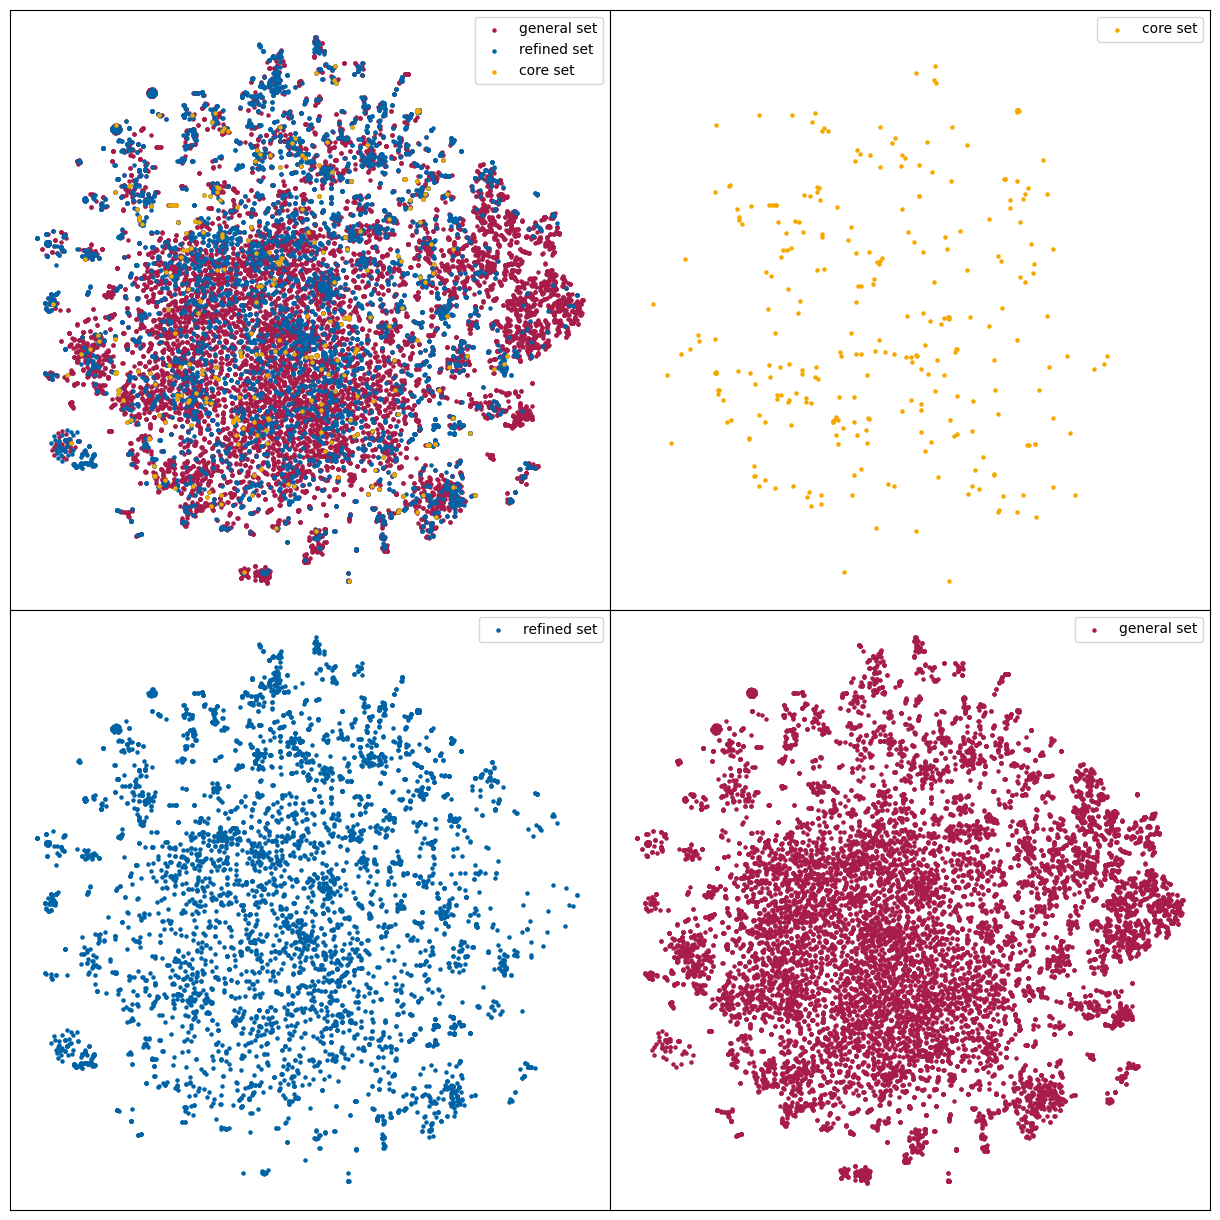

In [32]:
# ECFP descriptors
df = pd.read_csv("../data/Descriptors/ECFPs.csv")
df.drop("PDB code",inplace=True, axis=1)

df.replace("general-set","general set",inplace=True)
df.replace("refined-set","refined set",inplace=True)
df.replace("coreset","core set",inplace=True)

df_general = df[df["Settype"] == "general set"]
df_refined = df[df["Settype"] == "refined set"]
df_core = df[df["Settype"] == "core set"]

df_data = df.drop("Settype",inplace=False,axis=1)
df_refined_data = df[df["Settype"] == "refined set"].drop("Settype",inplace=False,axis=1)

scaler = StandardScaler().fit(df_refined_data)

df_scaled = scaler.transform(df_data)

df_scaled = np.nan_to_num(df_scaled)

pca = PCA(n_components=35)
df_scaled = pca.fit_transform(df_scaled)

print("preprocessing DONE")

reducer = TSNE(n_components=2)
reducer = reducer.fit(df_scaled)
points_all = reducer.fit_transform(df_scaled)
points_general = points_all[df.Settype == "general set"]
points_refined = points_all[df.Settype == "refined set"]
points_core = points_all[df.Settype == "core set"]
print("t-SNE training DONE")

# Plot t-SNE
fig, axs = plt.subplots(2, 2, figsize=(12, 12),sharex=True,sharey=True,constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=0.0, h_pad=0.0, hspace=0.0, wspace=0.0)

# Plot all points
axs[0, 0].scatter(points_general[:, 0], points_general[:, 1], s=5, label="general set", color="#A71C49", alpha=1)
axs[0, 0].scatter(points_refined[:, 0], points_refined[:, 1], s=5, label="refined set", color="#0063A6", alpha=1)
axs[0, 0].scatter(points_core[:, 0], points_core[:, 1], s=5, label="core set", color="#F6A800", alpha=1)
axs[0, 0].legend(loc="best")

# Plot points_core
axs[0, 1].scatter(points_core[:, 0], points_core[:, 1], s=5, label="core set", color="#F6A800", alpha=1)
axs[0, 1].legend(loc="best")

# Plot points_refined
axs[1, 0].scatter(points_refined[:, 0], points_refined[:, 1], s=5, label="refined set", color="#0063A6", alpha=1)
axs[1, 0].legend(loc="best")

# Plot points_general
axs[1, 1].scatter(points_general[:, 0], points_general[:, 1], s=5, label="general set", color="#A71C49", alpha=1)
axs[1, 1].legend(loc="best")

for ax in axs:
    for a in ax:
        a.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
        
plt.show()

/tmp/ipykernel_34891/3629485793.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_general.drop("Settype",inplace=True, axis=1)
/tmp/ipykernel_34891/3629485793.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_refined.drop("Settype",inplace=True, axis=1)
/tmp/ipykernel_34891/3629485793.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_core.drop("Settype",inplace=True, axis=1)


preprocessing DONE


/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(19728, 2) (8141, 2) (460, 2) (4718, 2) (4915, 2) (772, 2) (295, 2) (426, 2) (1, 2)
t-SNE training DONE


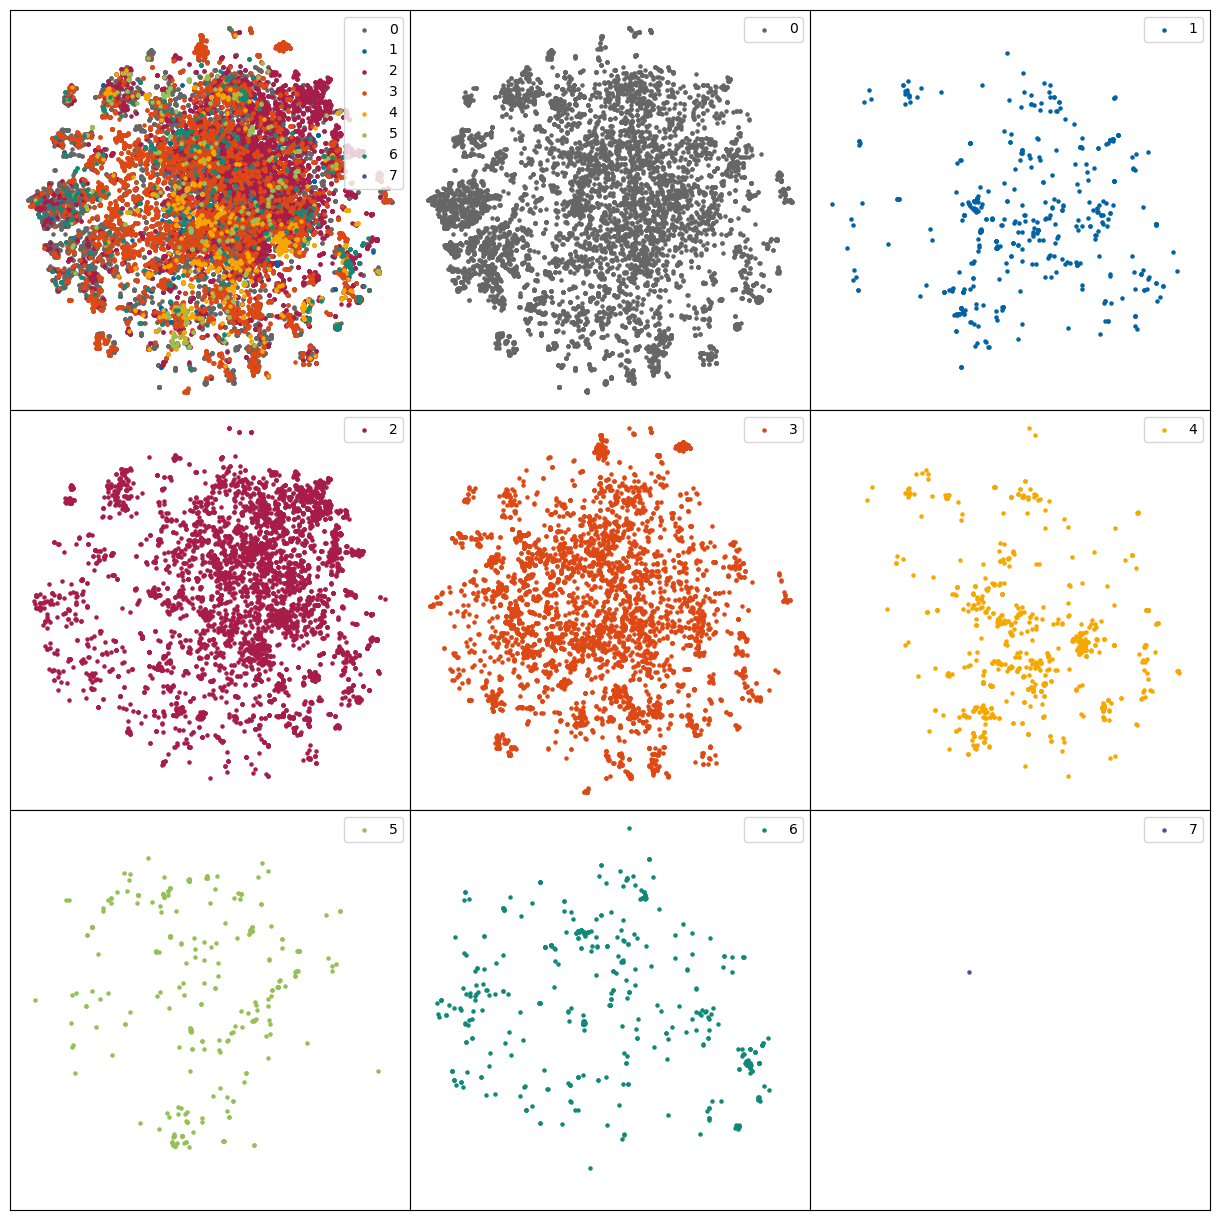

In [33]:
df = pd.read_csv("../data/Descriptors/ECFPs.csv")

df.replace("general-set","general set",inplace=True)
df.replace("refined-set","refined set",inplace=True)
df.replace("coreset","core set",inplace=True)

df_general = df[df["Settype"] == "general set"]
df_refined = df[df["Settype"] == "refined set"]
df_core = df[df["Settype"] == "core set"]

df.drop("Settype",inplace=True, axis=1)
df_general.drop("Settype",inplace=True, axis=1)
df_refined.drop("Settype",inplace=True, axis=1)
df_core.drop("Settype",inplace=True, axis=1)

df_1 = pd.read_csv("../data/exp_data/EC_numbers/1_x_x_x.csv")
df_2 = pd.read_csv("../data/exp_data/EC_numbers/2_x_x_x.csv")
df_3 = pd.read_csv("../data/exp_data/EC_numbers/3_x_x_x.csv")
df_4 = pd.read_csv("../data/exp_data/EC_numbers/4_x_x_x.csv")
df_5 = pd.read_csv("../data/exp_data/EC_numbers/5_x_x_x.csv")
df_6 = pd.read_csv("../data/exp_data/EC_numbers/6_x_x_x.csv")
df_7 = pd.read_csv("../data/exp_data/EC_numbers/7_x_x_x.csv")

lst = []

for pdb in df["PDB code"]:
    if pdb in df_1["PDB code"].values:
        lst.append(1)
    elif pdb in df_2["PDB code"].values:
        lst.append(2)
    elif pdb in df_3["PDB code"].values:
        lst.append(3)
    elif pdb in df_4["PDB code"].values:
        lst.append(4)
    elif pdb in df_5["PDB code"].values:
        lst.append(5)
    elif pdb in df_6["PDB code"].values:
        lst.append(6)
    elif pdb in df_7["PDB code"].values:
        lst.append(7)
    else:
        lst.append(0)

df["Class"] = lst

df.drop("PDB code",inplace=True, axis=1)

df_data = df.drop("Class",inplace=False,axis=1)

df_refined_data = df_refined.drop("PDB code",inplace=False,axis=1)
scaler = StandardScaler().fit(df_refined_data)

df_scaled = scaler.transform(df_data)

df_scaled = np.nan_to_num(df_scaled)

pca = PCA(n_components=35)
df_scaled = pca.fit_transform(df_scaled)

print("preprocessing DONE")

reducer = TSNE(n_components=2)

reducer = reducer.fit(df_scaled)
points_all = reducer.fit_transform(df_scaled)
points_0 = points_all[df.Class == 0]
points_1 = points_all[df.Class == 1]
points_2 = points_all[df.Class == 2]
points_3 = points_all[df.Class == 3]
points_4 = points_all[df.Class == 4]
points_5 = points_all[df.Class == 5]
points_6 = points_all[df.Class == 6]
points_7 = points_all[df.Class == 7]
print(points_all.shape,points_0.shape,points_1.shape,points_2.shape,points_3.shape,points_4.shape,points_5.shape,points_6.shape,points_7.shape)
print("t-SNE training DONE")

# Plot t-SNE
fig, axs = plt.subplots(3, 3, figsize=(12, 12),sharex=True,sharey=True,constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=0.0, h_pad=0.0, hspace=0.0, wspace=0.0)

# Plot all points
axs[0, 0].scatter(points_0[:, 0], points_0[:, 1], s=5, label="0", color="#666666", alpha=1)
axs[0, 0].scatter(points_1[:, 0], points_1[:, 1], s=5, label="1", color="#0063A6", alpha=1)
axs[0, 0].scatter(points_2[:, 0], points_2[:, 1], s=5, label="2", color="#A71C49", alpha=1)
axs[0, 0].scatter(points_3[:, 0], points_3[:, 1], s=5, label="3", color="#DD4814", alpha=1)
axs[0, 0].scatter(points_4[:, 0], points_4[:, 1], s=5, label="4", color="#F6A800", alpha=1)
axs[0, 0].scatter(points_5[:, 0], points_5[:, 1], s=5, label="5", color="#94C154", alpha=1)
axs[0, 0].scatter(points_6[:, 0], points_6[:, 1], s=5, label="6", color="#11897A", alpha=1)
axs[0, 0].scatter(points_7[:, 0], points_7[:, 1], s=5, label="7", color="#4B51A1", alpha=1)
axs[0, 0].legend(loc="best")

# Plot points_0
axs[0, 1].scatter(points_0[:, 0], points_0[:, 1], s=5, label="0", color="#666666", alpha=1)
axs[0, 1].legend(loc="best")

# Plot points_1
axs[0, 2].scatter(points_1[:, 0], points_1[:, 1], s=5, label="1", color="#0063A6", alpha=1)
axs[0, 2].legend(loc="best")

# Plot points_2
axs[1, 0].scatter(points_2[:, 0], points_2[:, 1], s=5, label="2", color="#A71C49", alpha=1)
axs[1, 0].legend(loc="best")

# Plot points_3
axs[1, 1].scatter(points_3[:, 0], points_3[:, 1], s=5, label="3", color="#DD4814", alpha=1)
axs[1, 1].legend(loc="best")

# Plot points_4
axs[1, 2].scatter(points_4[:, 0], points_4[:, 1], s=5, label="4", color="#F6A800", alpha=1)
axs[1, 2].legend(loc="best")

# Plot points_5
axs[2, 0].scatter(points_5[:, 0], points_5[:, 1], s=5, label="5", color="#94C154", alpha=1)
axs[2, 0].legend(loc="best")

# Plot points_6
axs[2, 1].scatter(points_6[:, 0], points_6[:, 1], s=5, label="6", color="#11897A", alpha=1)
axs[2, 1].legend(loc="best")

# Plot points_7
axs[2, 2].scatter(points_7[:, 0], points_7[:, 1], s=5, label="7", color="#4B51A1", alpha=1)
axs[2, 2].legend(loc="best")

for ax in axs:
    for a in ax:
        a.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
        
plt.show()

preprocessing DONE


/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


t-SNE training DONE


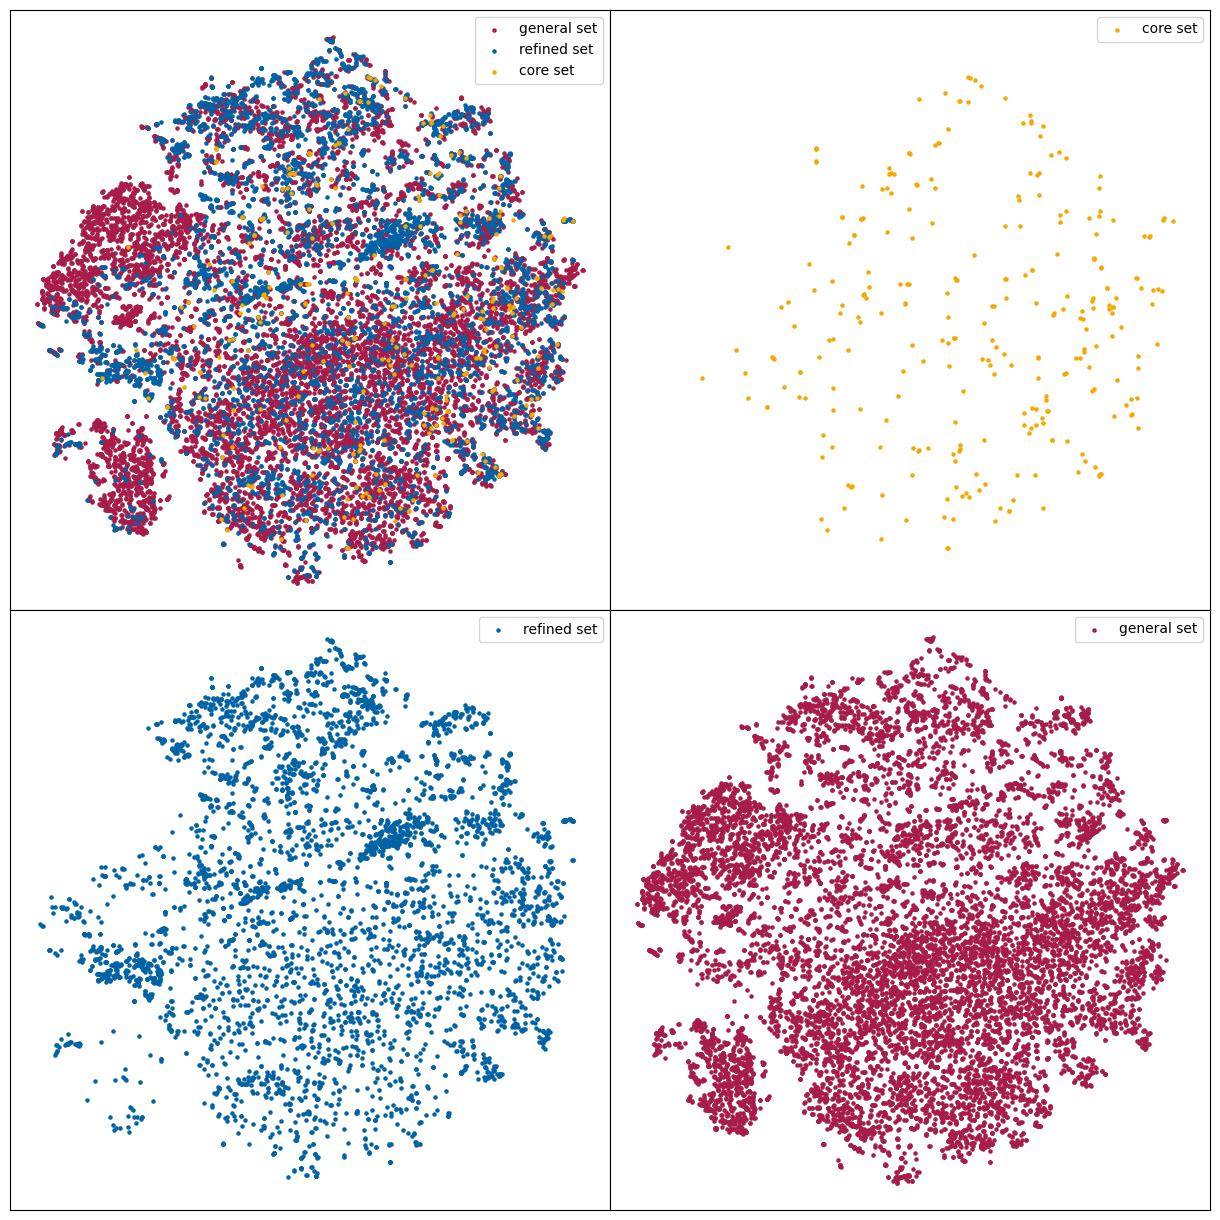

In [34]:
df = pd.read_csv("../data/Descriptors/DXGB.csv")
df.drop("PDB code",inplace=True, axis=1)
df.dropna(inplace=True)

df.replace("general-set","general set",inplace=True)
df.replace("refined-set","refined set",inplace=True)
df.replace("coreset","core set",inplace=True)

df_general = df[df["Settype"] == "general set"]
df_refined = df[df["Settype"] == "refined set"]
df_core = df[df["Settype"] == "core set"]

df_data = df.drop("Settype",inplace=False,axis=1)
df_refined_data = df[df["Settype"] == "refined set"].drop("Settype",inplace=False,axis=1)

scaler = StandardScaler().fit(df_refined_data)

df_scaled = scaler.transform(df_data)

df_scaled = np.nan_to_num(df_scaled)

pca = PCA(n_components=35)
df_scaled = pca.fit_transform(df_scaled)

print("preprocessing DONE")

reducer = TSNE(n_components=2)
reducer = reducer.fit(df_scaled)
points_all = reducer.fit_transform(df_scaled)
points_general = points_all[df.Settype == "general set"]
points_refined = points_all[df.Settype == "refined set"]
points_core = points_all[df.Settype == "core set"]
print("t-SNE training DONE")

# Plot t-SNE
fig, axs = plt.subplots(2, 2, figsize=(12, 12),sharex=True,sharey=True,constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=0.0, h_pad=0.0, hspace=0.0, wspace=0.0)

# Plot all points
axs[0, 0].scatter(points_general[:, 0], points_general[:, 1], s=5, label="general set", color="#A71C49", alpha=1)
axs[0, 0].scatter(points_refined[:, 0], points_refined[:, 1], s=5, label="refined set", color="#0063A6", alpha=1)
axs[0, 0].scatter(points_core[:, 0], points_core[:, 1], s=5, label="core set", color="#F6A800", alpha=1)
axs[0, 0].legend(loc="best")

# Plot points_core
axs[0, 1].scatter(points_core[:, 0], points_core[:, 1], s=5, label="core set", color="#F6A800", alpha=1)
axs[0, 1].legend(loc="best")

# Plot points_refined
axs[1, 0].scatter(points_refined[:, 0], points_refined[:, 1], s=5, label="refined set", color="#0063A6", alpha=1)
axs[1, 0].legend(loc="best")

# Plot points_general
axs[1, 1].scatter(points_general[:, 0], points_general[:, 1], s=5, label="general set", color="#A71C49", alpha=1)
axs[1, 1].legend(loc="best")

for ax in axs:
    for a in ax:
        a.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
        
plt.show()

/tmp/ipykernel_34891/930160326.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_general.drop("Settype",inplace=True, axis=1)
/tmp/ipykernel_34891/930160326.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_refined.drop("Settype",inplace=True, axis=1)
/tmp/ipykernel_34891/930160326.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_core.drop("Settype",inplace=True, axis=1)


preprocessing DONE


/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(18904, 2) (7976, 2) (450, 2) (4509, 2) (4550, 2) (726, 2) (291, 2) (401, 2) (1, 2)
t-SNE training DONE


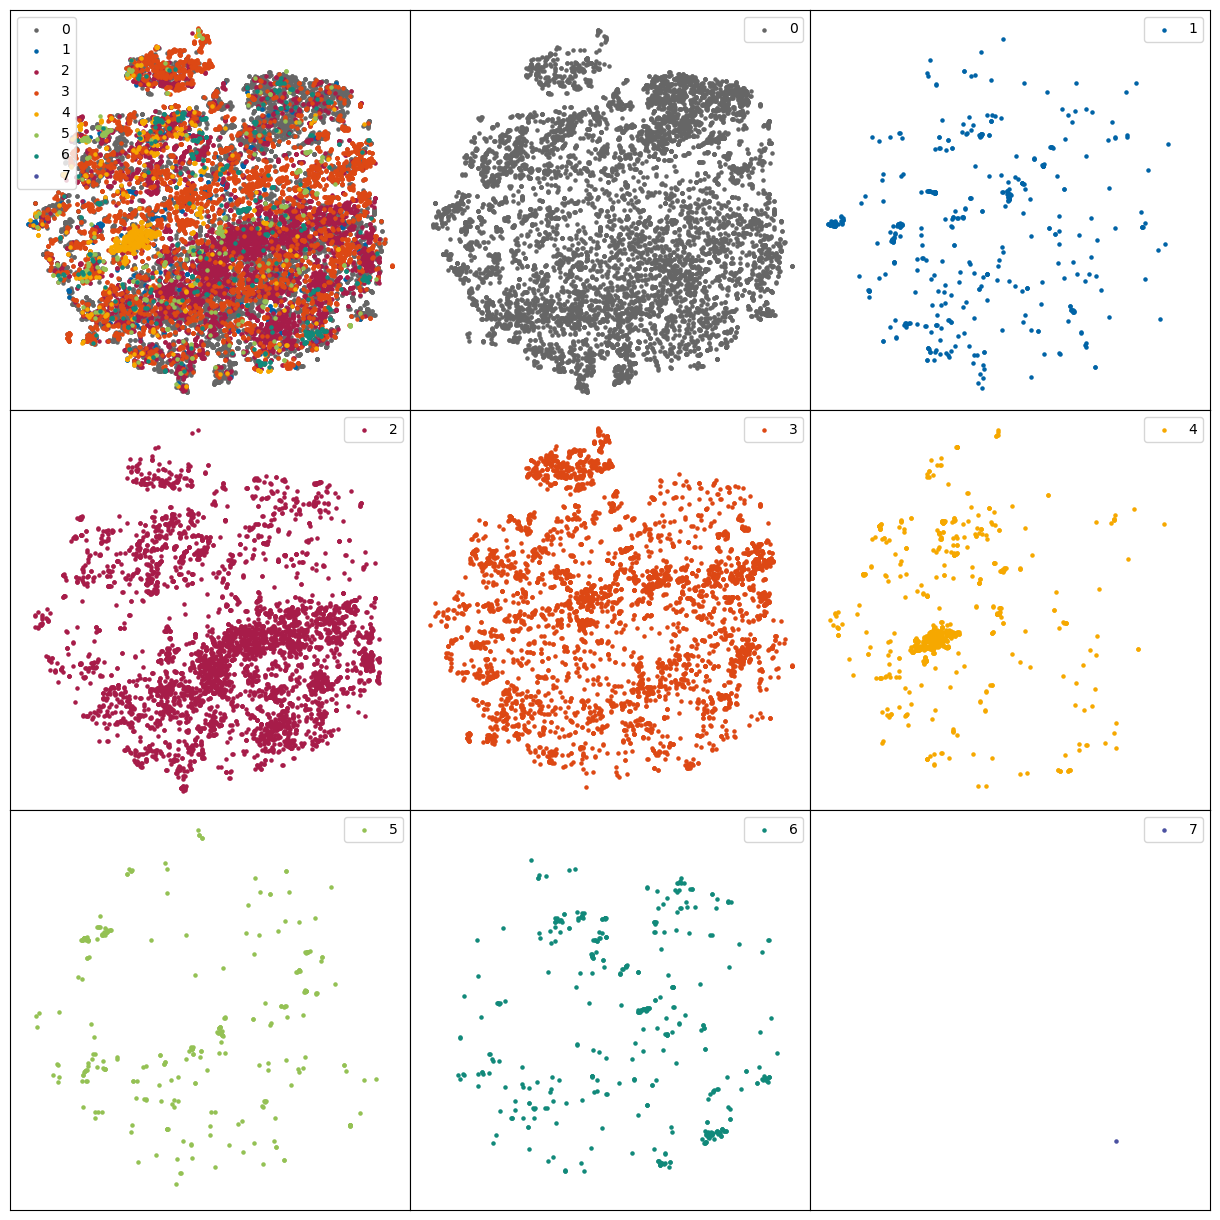

In [35]:
# DXGB descriptors
df = pd.read_csv("../data/Descriptors/DXGB.csv")

df_general = df[df["Settype"] == "general-set"]
df_refined = df[df["Settype"] == "refined-set"]
df_core = df[df["Settype"] == "coreset"]

df.drop("Settype",inplace=True, axis=1)
df_general.drop("Settype",inplace=True, axis=1)
df_refined.drop("Settype",inplace=True, axis=1)
df_core.drop("Settype",inplace=True, axis=1)

df_1 = pd.read_csv("../data/exp_data/EC_numbers/1_x_x_x.csv")
df_2 = pd.read_csv("../data/exp_data/EC_numbers/2_x_x_x.csv")
df_3 = pd.read_csv("../data/exp_data/EC_numbers/3_x_x_x.csv")
df_4 = pd.read_csv("../data/exp_data/EC_numbers/4_x_x_x.csv")
df_5 = pd.read_csv("../data/exp_data/EC_numbers/5_x_x_x.csv")
df_6 = pd.read_csv("../data/exp_data/EC_numbers/6_x_x_x.csv")
df_7 = pd.read_csv("../data/exp_data/EC_numbers/7_x_x_x.csv")

lst = []

for pdb in df["PDB code"]:
    if pdb in df_1["PDB code"].values:
        lst.append(1)
    elif pdb in df_2["PDB code"].values:
        lst.append(2)
    elif pdb in df_3["PDB code"].values:
        lst.append(3)
    elif pdb in df_4["PDB code"].values:
        lst.append(4)
    elif pdb in df_5["PDB code"].values:
        lst.append(5)
    elif pdb in df_6["PDB code"].values:
        lst.append(6)
    elif pdb in df_7["PDB code"].values:
        lst.append(7)
    else:
        lst.append(0)

df["Class"] = lst

df.drop("PDB code",inplace=True, axis=1)

df_data = df.drop("Class",inplace=False,axis=1)

df_refined_data = df_refined.drop("PDB code",inplace=False,axis=1)
scaler = StandardScaler().fit(df_refined_data)

df_scaled = scaler.transform(df_data)

df_scaled = np.nan_to_num(df_scaled)

pca = PCA(n_components=35)
df_scaled = pca.fit_transform(df_scaled)

print("preprocessing DONE")

reducer = TSNE(n_components=2)

reducer = reducer.fit(df_scaled)
points_all = reducer.fit_transform(df_scaled)
points_0 = points_all[df.Class == 0]
points_1 = points_all[df.Class == 1]
points_2 = points_all[df.Class == 2]
points_3 = points_all[df.Class == 3]
points_4 = points_all[df.Class == 4]
points_5 = points_all[df.Class == 5]
points_6 = points_all[df.Class == 6]
points_7 = points_all[df.Class == 7]
print(points_all.shape,points_0.shape,points_1.shape,points_2.shape,points_3.shape,points_4.shape,points_5.shape,points_6.shape,points_7.shape)
print("t-SNE training DONE")

# Plot t-SNE
fig, axs = plt.subplots(3, 3, figsize=(12, 12),sharex=True,sharey=True,constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=0.0, h_pad=0.0, hspace=0.0, wspace=0.0)

# Plot all points
axs[0, 0].scatter(points_0[:, 0], points_0[:, 1], s=5, label="0", color="#666666", alpha=1)
axs[0, 0].scatter(points_1[:, 0], points_1[:, 1], s=5, label="1", color="#0063A6", alpha=1)
axs[0, 0].scatter(points_2[:, 0], points_2[:, 1], s=5, label="2", color="#A71C49", alpha=1)
axs[0, 0].scatter(points_3[:, 0], points_3[:, 1], s=5, label="3", color="#DD4814", alpha=1)
axs[0, 0].scatter(points_4[:, 0], points_4[:, 1], s=5, label="4", color="#F6A800", alpha=1)
axs[0, 0].scatter(points_5[:, 0], points_5[:, 1], s=5, label="5", color="#94C154", alpha=1)
axs[0, 0].scatter(points_6[:, 0], points_6[:, 1], s=5, label="6", color="#11897A", alpha=1)
axs[0, 0].scatter(points_7[:, 0], points_7[:, 1], s=5, label="7", color="#4B51A1", alpha=1)
axs[0, 0].legend(loc="best")

# Plot points_0
axs[0, 1].scatter(points_0[:, 0], points_0[:, 1], s=5, label="0", color="#666666", alpha=1)
axs[0, 1].legend(loc="best")

# Plot points_1
axs[0, 2].scatter(points_1[:, 0], points_1[:, 1], s=5, label="1", color="#0063A6", alpha=1)
axs[0, 2].legend(loc="best")

# Plot points_2
axs[1, 0].scatter(points_2[:, 0], points_2[:, 1], s=5, label="2", color="#A71C49", alpha=1)
axs[1, 0].legend(loc="best")

# Plot points_3
axs[1, 1].scatter(points_3[:, 0], points_3[:, 1], s=5, label="3", color="#DD4814", alpha=1)
axs[1, 1].legend(loc="best")

# Plot points_4
axs[1, 2].scatter(points_4[:, 0], points_4[:, 1], s=5, label="4", color="#F6A800", alpha=1)
axs[1, 2].legend(loc="best")

# Plot points_5
axs[2, 0].scatter(points_5[:, 0], points_5[:, 1], s=5, label="5", color="#94C154", alpha=1)
axs[2, 0].legend(loc="best")

# Plot points_6
axs[2, 1].scatter(points_6[:, 0], points_6[:, 1], s=5, label="6", color="#11897A", alpha=1)
axs[2, 1].legend(loc="best")

# Plot points_7
axs[2, 2].scatter(points_7[:, 0], points_7[:, 1], s=5, label="7", color="#4B51A1", alpha=1)
axs[2, 2].legend(loc="best")

for ax in axs:
    for a in ax:
        a.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
        
plt.show()

In [36]:
# # X-GRADE descriptors PL-REX
# # Load and preprocess data
# df_refined = pd.read_csv("../data/Descriptors/PDBbind_refined_set_X-GRADE.csv")
# df_refined.drop("PDB code", inplace=True, axis=1)
# df_refined["Settype"] = "refined set"

# df_001 = pd.read_csv("/data/shared/datasets/PL-REX/001-CA2/structures_pl-rex/X-GRADE.csv")
# df_001.drop("PDB code", inplace=True, axis=1)
# df_001["Settype"] = "001-CA2"

# df_002 = pd.read_csv("/data/shared/datasets/PL-REX/002-HIV-PR/structures_pl-rex/X-GRADE.csv")
# df_002.drop("PDB code", inplace=True, axis=1)
# df_002["Settype"] = "002-HIV-PR"

# df_003 = pd.read_csv("/data/shared/datasets/PL-REX/003-CK2/structures_pl-rex/X-GRADE.csv")
# df_003.drop("PDB code", inplace=True, axis=1)
# df_003["Settype"] = "003-CK2"

# df_004 = pd.read_csv("/data/shared/datasets/PL-REX/004-AR/structures_pl-rex/X-GRADE.csv")
# df_004.drop("PDB code", inplace=True, axis=1)
# df_004["Settype"] = "004-AR"

# df_005 = pd.read_csv("/data/shared/datasets/PL-REX/005-Cath-D/structures_pl-rex/X-GRADE.csv")
# df_005.drop("PDB code", inplace=True, axis=1)
# df_005["Settype"] = "005-Cath-D"

# df_006 = pd.read_csv("/data/shared/datasets/PL-REX/006-BACE1-D3R/structures_pl-rex/X-GRADE.csv")
# df_006.drop("PDB code", inplace=True, axis=1)
# df_006["Settype"] = "006-BACE1-D3R"

# df_007 = pd.read_csv("/data/shared/datasets/PL-REX/007-JAK1/structures_pl-rex/X-GRADE.csv")
# df_007.drop("PDB code", inplace=True, axis=1)
# df_007["Settype"] = "007-JAK1"

# df_008 = pd.read_csv("/data/shared/datasets/PL-REX/008-Trypsin/structures_pl-rex/X-GRADE.csv")
# df_008.drop("PDB code", inplace=True, axis=1)
# df_008["Settype"] = "008-Trypsin"

# df_009 = pd.read_csv("/data/shared/datasets/PL-REX/009-CDK2/structures_pl-rex/X-GRADE.csv")
# df_009.drop("PDB code", inplace=True, axis=1)
# df_009["Settype"] = "009-CDK2"

# df_010 = pd.read_csv("/data/shared/datasets/PL-REX/010-MMP12/structures_pl-rex/X-GRADE.csv")
# df_010.drop("PDB code", inplace=True, axis=1)
# df_010["Settype"] = "010-MMP12"

# dataframes = [df_refined, df_001, df_002, df_003, df_004, df_005, df_006, df_007, df_008, df_009, df_010]
# df = pd.concat(dataframes)

# # Separate data and set type
# df_data = df.drop("Settype", inplace=False, axis=1)
# df_refined_data = df_refined.drop("Settype", inplace=False, axis=1)

# # Standardize the data
# scaler = StandardScaler().fit(df_refined_data)
# df_scaled = scaler.transform(df_data)
# df_scaled = np.nan_to_num(df_scaled)

# pca = PCA(n_components=35)
# df_scaled = pca.fit_transform(df_scaled)

# print("Preprocessing DONE")

# # Apply t-SNE
# reducer = TSNE(n_components=2)
# points_all = reducer.fit_transform(df_scaled)
# print("t-SNE training DONE")

# # Convert Settype column to a category
# df["Settype"] = df["Settype"].astype('category')
# categories = df["Settype"].cat.categories
# colors = ["#0063A6", "#666666", "#A71C49", "#DD4814", "#F6A800", "#94C154", "#11897A", "#4B51A1", "#FF0000", "#00FF00", "#D3D3D3"]

# # Plot UMAP
# plt.figure(figsize=(12, 12))

# # Plot refined set in the background
# subset_refined = points_all[df["Settype"] == "refined set"]
# plt.scatter(subset_refined[:, 0], subset_refined[:, 1], s=5, label="refined set", color="#C0C0C0", alpha=1)

# # Plot all other sets on top
# for i, category in enumerate(categories):
#     if category != "refined set":
#         subset = points_all[df["Settype"] == category]
#         plt.scatter(subset[:, 0], subset[:, 1], s=30, label=category, color=colors[i], alpha=1)

# # plt.title("t-SNE projection of the PL-REX dataset in comparison to the PDBbind refined set using X-GRADE descriptors")
# plt.xticks([])
# plt.yticks([])
# plt.xlabel("t-SNE 1")
# plt.ylabel("t-SNE 2")
# plt.legend(loc="best")
# plt.show()


In [37]:
# # GRADE descriptors PL-REX
# # Load and preprocess data
# df_refined = pd.read_csv("../data/Descriptors/PDBbind_refined_set_GRADE.csv")
# df_refined.drop("PDB code", inplace=True, axis=1)
# df_refined["Settype"] = "refined set"

# df_001 = pd.read_csv("/data/shared/datasets/PL-REX/001-CA2/structures_pl-rex/GRADE.csv")
# df_001.drop("PDB code", inplace=True, axis=1)
# df_001["Settype"] = "001-CA2"

# df_002 = pd.read_csv("/data/shared/datasets/PL-REX/002-HIV-PR/structures_pl-rex/GRADE.csv")
# df_002.drop("PDB code", inplace=True, axis=1)
# df_002["Settype"] = "002-HIV-PR"

# df_003 = pd.read_csv("/data/shared/datasets/PL-REX/003-CK2/structures_pl-rex/GRADE.csv")
# df_003.drop("PDB code", inplace=True, axis=1)
# df_003["Settype"] = "003-CK2"

# df_004 = pd.read_csv("/data/shared/datasets/PL-REX/004-AR/structures_pl-rex/GRADE.csv")
# df_004.drop("PDB code", inplace=True, axis=1)
# df_004["Settype"] = "004-AR"

# df_005 = pd.read_csv("/data/shared/datasets/PL-REX/005-Cath-D/structures_pl-rex/GRADE.csv")
# df_005.drop("PDB code", inplace=True, axis=1)
# df_005["Settype"] = "005-Cath-D"

# df_006 = pd.read_csv("/data/shared/datasets/PL-REX/006-BACE1-D3R/structures_pl-rex/GRADE.csv")
# df_006.drop("PDB code", inplace=True, axis=1)
# df_006["Settype"] = "006-BACE1-D3R"

# df_007 = pd.read_csv("/data/shared/datasets/PL-REX/007-JAK1/structures_pl-rex/GRADE.csv")
# df_007.drop("PDB code", inplace=True, axis=1)
# df_007["Settype"] = "007-JAK1"

# df_008 = pd.read_csv("/data/shared/datasets/PL-REX/008-Trypsin/structures_pl-rex/GRADE.csv")
# df_008.drop("PDB code", inplace=True, axis=1)
# df_008["Settype"] = "008-Trypsin"

# df_009 = pd.read_csv("/data/shared/datasets/PL-REX/009-CDK2/structures_pl-rex/GRADE.csv")
# df_009.drop("PDB code", inplace=True, axis=1)
# df_009["Settype"] = "009-CDK2"

# df_010 = pd.read_csv("/data/shared/datasets/PL-REX/010-MMP12/structures_pl-rex/GRADE.csv")
# df_010.drop("PDB code", inplace=True, axis=1)
# df_010["Settype"] = "010-MMP12"

# dataframes = [df_refined, df_001, df_002, df_003, df_004, df_005, df_006, df_007, df_008, df_009, df_010]
# df = pd.concat(dataframes)

# # Separate data and set type
# df_data = df.drop("Settype", inplace=False, axis=1)
# df_refined_data = df_refined.drop("Settype", inplace=False, axis=1)

# # Standardize the data
# scaler = StandardScaler().fit(df_refined_data)
# df_scaled = scaler.transform(df_data)
# df_scaled = np.nan_to_num(df_scaled)
# print("Preprocessing DONE")

# # Apply t-SNE
# reducer = TSNE(n_components=2)
# points_all = reducer.fit_transform(df_scaled)
# print("t-SNE training DONE")

# # Convert Settype column to a category
# df["Settype"] = df["Settype"].astype('category')
# categories = df["Settype"].cat.categories
# colors = ["#0063A6", "#666666", "#A71C49", "#DD4814", "#F6A800", "#94C154", "#11897A", "#4B51A1", "#FF0000", "#00FF00", "#D3D3D3"]

# # Plot UMAP
# plt.figure(figsize=(12, 12))

# # Plot refined set in the background
# subset_refined = points_all[df["Settype"] == "refined set"]
# plt.scatter(subset_refined[:, 0], subset_refined[:, 1], s=5, label="refined set", color="#C0C0C0", alpha=1)

# # Plot all other sets on top
# for i, category in enumerate(categories):
#     if category != "refined set":
#         subset = points_all[df["Settype"] == category]
#         plt.scatter(subset[:, 0], subset[:, 1], s=30, label=category, color=colors[i], alpha=1)

# # plt.title("UMAP projection of the PL-REX dataset in comparison to the PDBbind refined set using GRADE descriptors")
# plt.xticks([])
# plt.yticks([])
# plt.xlabel("t-SNE 1")
# plt.ylabel("t-SNE 2")
# plt.legend(loc="best")
# plt.show()